# Dog and Cats image classefire 

In this set we have lots of images of Dog and Cats

The Main goal is to train a model that can clasefy an image and predictt if it a Dog or Cat

The data contains  color images in different sizes  

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# Preprocssesing

first we check if in the Dataset we have corrupted images

In [ ]:
from os import listdir
import pathlib
import cv2

ca =  'PetImages/cat/'
for filename in listdir(dir_for_check):
    if filename.endswith(".jpg"):
        print(dir_for_check+filename)
        cv2.imread(dir_for_check+filename)

In [ ]:
from pathlib import Path
import imghdr


cat_check = pathlib.Path('inputs/PetImages/cat')
dog_check = pathlib.Path('inputs/PetImages/cat/')
image_extensions = [".png", ".jpg"]  

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(dog_check).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            # remove corrupt image
            os.remove(filepath)
            print(f"{filepath} was removed")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

In [ ]:
import glob

img_paths = glob.glob(os.path.join('C:/inputs/PetImages','*/*.*'))

bad_paths = []

for image in img_paths:
    try:
        img_bytes = tf.io.read_file(image)
        decoded_img = tf.io.decode_image(img_bytes)
    except tf.errors.InvalidArgumentError as e:
        print(f"Found bad path {image_path}...{e}")
        bad_paths.append(image)

    print(f"{image}: OK")

print("BAD PATHS:")
for bad_path in bad_paths:
    print(f"{bad_path}")
    os.remove(bad_path)
    print(f"{bad_path} was removed")


In [2]:
dir_path ='/inputs/PetImages'

### Uploading the full data set

In [3]:
batch_size = 32
# we will resize the images into 128*128 px over 3 layers (rgb)
img_height = 128
img_width = 128

total_ds = tf.keras.utils.image_dataset_from_directory(
    dir_path,
    color_mode= 'rgb',
    labels="inferred",
    label_mode="int",
    image_size = (img_height, img_width),
    shuffle=True,
    batch_size=None

                
)

Found 24970 files belonging to 2 classes.


In [4]:
total_size = len(total_ds)

In [5]:
# counting images by class and check if balanced


i=0
cat = 0
dog = 0
for images, labels in total_ds.take(len(total_ds)):
    print(total_ds.class_names[labels], i)
    if total_ds.class_names[labels] == 'Cat':
        cat += 1
    if total_ds.class_names[labels] == 'Dog':
        dog += 1
    i+=1
print (cat , dog)

Cat 0
Cat 1
Cat 2
Dog 3
Dog 4
Dog 5
Cat 6
Cat 7
Cat 8
Dog 9
Dog 10
Dog 11
Dog 12
Dog 13
Dog 14
Dog 15
Cat 16
Cat 17
Cat 18
Cat 19
Dog 20
Cat 21
Dog 22
Cat 23
Dog 24
Dog 25
Dog 26
Dog 27
Cat 28
Cat 29
Cat 30
Cat 31
Dog 32
Dog 33
Cat 34
Dog 35
Dog 36
Dog 37
Dog 38
Dog 39
Cat 40
Cat 41
Cat 42
Dog 43
Dog 44
Cat 45
Cat 46
Dog 47
Cat 48
Cat 49
Dog 50
Dog 51
Cat 52
Cat 53
Cat 54
Dog 55
Cat 56
Dog 57
Cat 58
Dog 59
Cat 60
Cat 61
Dog 62
Dog 63
Cat 64
Cat 65
Cat 66
Cat 67
Cat 68
Cat 69
Dog 70
Cat 71
Dog 72
Dog 73
Cat 74
Dog 75
Cat 76
Dog 77
Cat 78
Cat 79
Cat 80
Dog 81
Dog 82
Cat 83
Cat 84
Cat 85
Cat 86
Dog 87
Cat 88
Cat 89
Cat 90
Cat 91
Dog 92
Dog 93
Cat 94
Dog 95
Cat 96
Dog 97
Cat 98
Dog 99
Cat 100
Cat 101
Dog 102
Dog 103
Cat 104
Dog 105
Cat 106
Dog 107
Dog 108
Cat 109
Cat 110
Dog 111
Cat 112
Cat 113
Cat 114
Dog 115
Dog 116
Cat 117
Dog 118
Dog 119
Cat 120
Cat 121
Cat 122
Cat 123
Cat 124
Cat 125
Dog 126
Dog 127
Cat 128
Dog 129
Dog 130
Dog 131
Dog 132
Cat 133
Dog 134
Cat 135
Cat 136
Dog 137
Cat 13

Dog 1042
Dog 1043
Cat 1044
Cat 1045
Dog 1046
Dog 1047
Dog 1048
Cat 1049
Dog 1050
Cat 1051
Cat 1052
Cat 1053
Dog 1054
Cat 1055
Cat 1056
Cat 1057
Cat 1058
Cat 1059
Cat 1060
Dog 1061
Cat 1062
Cat 1063
Dog 1064
Dog 1065
Dog 1066
Cat 1067
Cat 1068
Cat 1069
Dog 1070
Cat 1071
Dog 1072
Dog 1073
Dog 1074
Dog 1075
Cat 1076
Dog 1077
Dog 1078
Cat 1079
Dog 1080
Cat 1081
Dog 1082
Dog 1083
Cat 1084
Dog 1085
Dog 1086
Cat 1087
Cat 1088
Dog 1089
Dog 1090
Dog 1091
Dog 1092
Cat 1093
Cat 1094
Dog 1095
Cat 1096
Dog 1097
Dog 1098
Dog 1099
Cat 1100
Dog 1101
Dog 1102
Cat 1103
Dog 1104
Dog 1105
Cat 1106
Cat 1107
Dog 1108
Cat 1109
Cat 1110
Dog 1111
Dog 1112
Dog 1113
Cat 1114
Dog 1115
Cat 1116
Cat 1117
Cat 1118
Dog 1119
Dog 1120
Dog 1121
Cat 1122
Dog 1123
Dog 1124
Dog 1125
Dog 1126
Cat 1127
Cat 1128
Cat 1129
Cat 1130
Cat 1131
Dog 1132
Dog 1133
Cat 1134
Dog 1135
Cat 1136
Dog 1137
Cat 1138
Dog 1139
Dog 1140
Cat 1141
Dog 1142
Cat 1143
Dog 1144
Dog 1145
Dog 1146
Dog 1147
Dog 1148
Cat 1149
Cat 1150
Cat 1151
Dog 1152
C

Dog 1974
Dog 1975
Cat 1976
Cat 1977
Dog 1978
Cat 1979
Cat 1980
Dog 1981
Dog 1982
Cat 1983
Cat 1984
Cat 1985
Cat 1986
Cat 1987
Dog 1988
Dog 1989
Cat 1990
Cat 1991
Cat 1992
Cat 1993
Dog 1994
Dog 1995
Dog 1996
Dog 1997
Cat 1998
Dog 1999
Cat 2000
Cat 2001
Dog 2002
Cat 2003
Cat 2004
Dog 2005
Cat 2006
Cat 2007
Dog 2008
Dog 2009
Dog 2010
Cat 2011
Cat 2012
Cat 2013
Dog 2014
Cat 2015
Cat 2016
Cat 2017
Dog 2018
Cat 2019
Dog 2020
Cat 2021
Dog 2022
Cat 2023
Dog 2024
Dog 2025
Cat 2026
Cat 2027
Dog 2028
Dog 2029
Cat 2030
Dog 2031
Cat 2032
Cat 2033
Dog 2034
Cat 2035
Dog 2036
Cat 2037
Dog 2038
Cat 2039
Cat 2040
Dog 2041
Dog 2042
Dog 2043
Cat 2044
Dog 2045
Dog 2046
Dog 2047
Dog 2048
Cat 2049
Dog 2050
Dog 2051
Cat 2052
Cat 2053
Cat 2054
Dog 2055
Cat 2056
Cat 2057
Cat 2058
Dog 2059
Cat 2060
Dog 2061
Dog 2062
Dog 2063
Cat 2064
Cat 2065
Cat 2066
Cat 2067
Dog 2068
Dog 2069
Dog 2070
Cat 2071
Dog 2072
Cat 2073
Dog 2074
Dog 2075
Dog 2076
Cat 2077
Dog 2078
Dog 2079
Cat 2080
Dog 2081
Dog 2082
Cat 2083
Dog 2084
C

Dog 2896
Cat 2897
Cat 2898
Cat 2899
Dog 2900
Cat 2901
Cat 2902
Cat 2903
Cat 2904
Dog 2905
Cat 2906
Dog 2907
Cat 2908
Cat 2909
Dog 2910
Dog 2911
Cat 2912
Dog 2913
Cat 2914
Dog 2915
Dog 2916
Cat 2917
Cat 2918
Cat 2919
Dog 2920
Cat 2921
Dog 2922
Cat 2923
Dog 2924
Cat 2925
Dog 2926
Dog 2927
Dog 2928
Dog 2929
Dog 2930
Cat 2931
Dog 2932
Dog 2933
Cat 2934
Cat 2935
Dog 2936
Cat 2937
Dog 2938
Cat 2939
Cat 2940
Dog 2941
Cat 2942
Dog 2943
Dog 2944
Dog 2945
Dog 2946
Dog 2947
Dog 2948
Cat 2949
Cat 2950
Dog 2951
Dog 2952
Dog 2953
Cat 2954
Cat 2955
Cat 2956
Cat 2957
Dog 2958
Cat 2959
Cat 2960
Cat 2961
Cat 2962
Cat 2963
Cat 2964
Dog 2965
Dog 2966
Cat 2967
Cat 2968
Cat 2969
Dog 2970
Cat 2971
Cat 2972
Cat 2973
Cat 2974
Cat 2975
Dog 2976
Cat 2977
Dog 2978
Dog 2979
Cat 2980
Dog 2981
Cat 2982
Dog 2983
Dog 2984
Dog 2985
Dog 2986
Cat 2987
Dog 2988
Cat 2989
Dog 2990
Cat 2991
Cat 2992
Cat 2993
Cat 2994
Dog 2995
Dog 2996
Cat 2997
Dog 2998
Dog 2999
Dog 3000
Dog 3001
Cat 3002
Cat 3003
Dog 3004
Dog 3005
Dog 3006
C

Dog 3823
Cat 3824
Cat 3825
Dog 3826
Dog 3827
Cat 3828
Dog 3829
Cat 3830
Dog 3831
Cat 3832
Cat 3833
Cat 3834
Cat 3835
Cat 3836
Dog 3837
Cat 3838
Dog 3839
Cat 3840
Dog 3841
Dog 3842
Dog 3843
Dog 3844
Dog 3845
Cat 3846
Cat 3847
Cat 3848
Cat 3849
Cat 3850
Cat 3851
Cat 3852
Cat 3853
Cat 3854
Cat 3855
Dog 3856
Cat 3857
Dog 3858
Dog 3859
Cat 3860
Cat 3861
Dog 3862
Dog 3863
Cat 3864
Cat 3865
Cat 3866
Cat 3867
Dog 3868
Dog 3869
Dog 3870
Cat 3871
Cat 3872
Dog 3873
Cat 3874
Cat 3875
Cat 3876
Cat 3877
Cat 3878
Cat 3879
Dog 3880
Dog 3881
Cat 3882
Cat 3883
Cat 3884
Dog 3885
Dog 3886
Cat 3887
Cat 3888
Cat 3889
Dog 3890
Dog 3891
Cat 3892
Dog 3893
Dog 3894
Dog 3895
Cat 3896
Cat 3897
Dog 3898
Dog 3899
Dog 3900
Dog 3901
Dog 3902
Cat 3903
Dog 3904
Dog 3905
Dog 3906
Dog 3907
Dog 3908
Dog 3909
Cat 3910
Dog 3911
Cat 3912
Cat 3913
Dog 3914
Cat 3915
Dog 3916
Dog 3917
Dog 3918
Dog 3919
Cat 3920
Cat 3921
Dog 3922
Dog 3923
Dog 3924
Cat 3925
Dog 3926
Dog 3927
Cat 3928
Dog 3929
Dog 3930
Cat 3931
Dog 3932
Cat 3933
D

Cat 4756
Cat 4757
Dog 4758
Cat 4759
Dog 4760
Cat 4761
Cat 4762
Dog 4763
Dog 4764
Cat 4765
Dog 4766
Cat 4767
Dog 4768
Dog 4769
Cat 4770
Dog 4771
Dog 4772
Cat 4773
Cat 4774
Cat 4775
Dog 4776
Dog 4777
Cat 4778
Cat 4779
Cat 4780
Dog 4781
Dog 4782
Cat 4783
Dog 4784
Cat 4785
Cat 4786
Dog 4787
Dog 4788
Cat 4789
Dog 4790
Cat 4791
Cat 4792
Dog 4793
Dog 4794
Cat 4795
Cat 4796
Dog 4797
Dog 4798
Dog 4799
Dog 4800
Dog 4801
Cat 4802
Cat 4803
Cat 4804
Cat 4805
Cat 4806
Cat 4807
Cat 4808
Cat 4809
Dog 4810
Dog 4811
Dog 4812
Cat 4813
Dog 4814
Cat 4815
Cat 4816
Dog 4817
Cat 4818
Cat 4819
Cat 4820
Cat 4821
Cat 4822
Dog 4823
Cat 4824
Cat 4825
Dog 4826
Dog 4827
Cat 4828
Cat 4829
Dog 4830
Dog 4831
Cat 4832
Cat 4833
Dog 4834
Cat 4835
Cat 4836
Dog 4837
Dog 4838
Cat 4839
Cat 4840
Cat 4841
Dog 4842
Dog 4843
Dog 4844
Dog 4845
Dog 4846
Dog 4847
Dog 4848
Cat 4849
Dog 4850
Dog 4851
Dog 4852
Dog 4853
Cat 4854
Dog 4855
Dog 4856
Dog 4857
Cat 4858
Cat 4859
Cat 4860
Cat 4861
Dog 4862
Dog 4863
Dog 4864
Cat 4865
Dog 4866
C

Dog 5678
Dog 5679
Cat 5680
Dog 5681
Dog 5682
Dog 5683
Dog 5684
Dog 5685
Dog 5686
Cat 5687
Dog 5688
Dog 5689
Dog 5690
Dog 5691
Cat 5692
Cat 5693
Dog 5694
Cat 5695
Dog 5696
Cat 5697
Dog 5698
Cat 5699
Cat 5700
Cat 5701
Cat 5702
Dog 5703
Cat 5704
Dog 5705
Cat 5706
Dog 5707
Dog 5708
Dog 5709
Cat 5710
Cat 5711
Cat 5712
Dog 5713
Cat 5714
Dog 5715
Dog 5716
Cat 5717
Cat 5718
Cat 5719
Dog 5720
Dog 5721
Cat 5722
Dog 5723
Cat 5724
Dog 5725
Cat 5726
Cat 5727
Dog 5728
Dog 5729
Cat 5730
Cat 5731
Dog 5732
Cat 5733
Dog 5734
Cat 5735
Dog 5736
Dog 5737
Cat 5738
Cat 5739
Cat 5740
Dog 5741
Cat 5742
Cat 5743
Dog 5744
Cat 5745
Dog 5746
Dog 5747
Cat 5748
Cat 5749
Cat 5750
Cat 5751
Cat 5752
Cat 5753
Cat 5754
Cat 5755
Cat 5756
Dog 5757
Dog 5758
Dog 5759
Dog 5760
Dog 5761
Cat 5762
Cat 5763
Dog 5764
Cat 5765
Dog 5766
Dog 5767
Dog 5768
Cat 5769
Dog 5770
Cat 5771
Cat 5772
Cat 5773
Dog 5774
Dog 5775
Cat 5776
Dog 5777
Cat 5778
Dog 5779
Cat 5780
Cat 5781
Cat 5782
Cat 5783
Dog 5784
Cat 5785
Dog 5786
Cat 5787
Cat 5788
C

Cat 6612
Cat 6613
Dog 6614
Dog 6615
Cat 6616
Dog 6617
Cat 6618
Dog 6619
Cat 6620
Cat 6621
Dog 6622
Dog 6623
Cat 6624
Dog 6625
Dog 6626
Cat 6627
Dog 6628
Dog 6629
Dog 6630
Dog 6631
Cat 6632
Cat 6633
Dog 6634
Cat 6635
Dog 6636
Dog 6637
Cat 6638
Dog 6639
Cat 6640
Dog 6641
Cat 6642
Dog 6643
Cat 6644
Cat 6645
Cat 6646
Cat 6647
Cat 6648
Dog 6649
Cat 6650
Cat 6651
Dog 6652
Cat 6653
Dog 6654
Dog 6655
Cat 6656
Cat 6657
Cat 6658
Cat 6659
Cat 6660
Dog 6661
Dog 6662
Cat 6663
Dog 6664
Dog 6665
Dog 6666
Cat 6667
Dog 6668
Dog 6669
Dog 6670
Cat 6671
Dog 6672
Dog 6673
Cat 6674
Dog 6675
Cat 6676
Cat 6677
Dog 6678
Dog 6679
Dog 6680
Dog 6681
Dog 6682
Dog 6683
Dog 6684
Cat 6685
Cat 6686
Cat 6687
Cat 6688
Dog 6689
Cat 6690
Dog 6691
Dog 6692
Dog 6693
Dog 6694
Cat 6695
Cat 6696
Cat 6697
Cat 6698
Dog 6699
Cat 6700
Cat 6701
Dog 6702
Cat 6703
Cat 6704
Cat 6705
Dog 6706
Dog 6707
Dog 6708
Cat 6709
Cat 6710
Dog 6711
Cat 6712
Cat 6713
Dog 6714
Dog 6715
Cat 6716
Dog 6717
Cat 6718
Cat 6719
Cat 6720
Cat 6721
Dog 6722
D

Dog 7551
Cat 7552
Dog 7553
Cat 7554
Cat 7555
Cat 7556
Dog 7557
Cat 7558
Dog 7559
Cat 7560
Cat 7561
Dog 7562
Cat 7563
Dog 7564
Dog 7565
Cat 7566
Cat 7567
Cat 7568
Dog 7569
Cat 7570
Cat 7571
Dog 7572
Cat 7573
Dog 7574
Dog 7575
Dog 7576
Cat 7577
Dog 7578
Dog 7579
Cat 7580
Dog 7581
Dog 7582
Dog 7583
Cat 7584
Dog 7585
Cat 7586
Dog 7587
Cat 7588
Cat 7589
Cat 7590
Cat 7591
Dog 7592
Dog 7593
Dog 7594
Dog 7595
Dog 7596
Cat 7597
Cat 7598
Cat 7599
Dog 7600
Dog 7601
Dog 7602
Cat 7603
Cat 7604
Cat 7605
Dog 7606
Cat 7607
Dog 7608
Cat 7609
Cat 7610
Cat 7611
Dog 7612
Dog 7613
Cat 7614
Cat 7615
Dog 7616
Dog 7617
Cat 7618
Cat 7619
Cat 7620
Cat 7621
Cat 7622
Cat 7623
Cat 7624
Dog 7625
Cat 7626
Dog 7627
Cat 7628
Cat 7629
Dog 7630
Dog 7631
Dog 7632
Dog 7633
Dog 7634
Cat 7635
Cat 7636
Dog 7637
Dog 7638
Cat 7639
Dog 7640
Cat 7641
Dog 7642
Cat 7643
Dog 7644
Dog 7645
Dog 7646
Cat 7647
Dog 7648
Cat 7649
Cat 7650
Cat 7651
Dog 7652
Cat 7653
Dog 7654
Dog 7655
Dog 7656
Cat 7657
Dog 7658
Dog 7659
Dog 7660
Dog 7661
D

Cat 8479
Dog 8480
Cat 8481
Cat 8482
Cat 8483
Cat 8484
Cat 8485
Dog 8486
Dog 8487
Dog 8488
Cat 8489
Dog 8490
Dog 8491
Cat 8492
Dog 8493
Dog 8494
Dog 8495
Dog 8496
Cat 8497
Cat 8498
Dog 8499
Dog 8500
Dog 8501
Cat 8502
Cat 8503
Dog 8504
Dog 8505
Dog 8506
Cat 8507
Dog 8508
Dog 8509
Dog 8510
Dog 8511
Dog 8512
Cat 8513
Cat 8514
Cat 8515
Dog 8516
Dog 8517
Cat 8518
Dog 8519
Dog 8520
Dog 8521
Dog 8522
Dog 8523
Cat 8524
Cat 8525
Cat 8526
Dog 8527
Dog 8528
Dog 8529
Cat 8530
Cat 8531
Dog 8532
Dog 8533
Dog 8534
Dog 8535
Cat 8536
Dog 8537
Dog 8538
Dog 8539
Cat 8540
Cat 8541
Dog 8542
Dog 8543
Cat 8544
Dog 8545
Cat 8546
Cat 8547
Cat 8548
Dog 8549
Dog 8550
Dog 8551
Dog 8552
Cat 8553
Cat 8554
Cat 8555
Cat 8556
Cat 8557
Cat 8558
Dog 8559
Cat 8560
Cat 8561
Dog 8562
Dog 8563
Dog 8564
Dog 8565
Cat 8566
Dog 8567
Cat 8568
Dog 8569
Cat 8570
Dog 8571
Cat 8572
Dog 8573
Dog 8574
Dog 8575
Cat 8576
Dog 8577
Cat 8578
Cat 8579
Dog 8580
Dog 8581
Cat 8582
Cat 8583
Dog 8584
Dog 8585
Cat 8586
Dog 8587
Dog 8588
Dog 8589
C

Dog 9397
Dog 9398
Cat 9399
Dog 9400
Cat 9401
Cat 9402
Dog 9403
Dog 9404
Dog 9405
Dog 9406
Dog 9407
Cat 9408
Cat 9409
Cat 9410
Cat 9411
Cat 9412
Cat 9413
Cat 9414
Cat 9415
Cat 9416
Dog 9417
Dog 9418
Cat 9419
Dog 9420
Dog 9421
Dog 9422
Dog 9423
Dog 9424
Dog 9425
Cat 9426
Dog 9427
Dog 9428
Dog 9429
Dog 9430
Cat 9431
Dog 9432
Dog 9433
Dog 9434
Dog 9435
Cat 9436
Cat 9437
Dog 9438
Dog 9439
Cat 9440
Dog 9441
Dog 9442
Dog 9443
Dog 9444
Dog 9445
Dog 9446
Dog 9447
Dog 9448
Dog 9449
Dog 9450
Dog 9451
Cat 9452
Cat 9453
Dog 9454
Cat 9455
Cat 9456
Dog 9457
Cat 9458
Cat 9459
Cat 9460
Dog 9461
Dog 9462
Dog 9463
Cat 9464
Cat 9465
Dog 9466
Cat 9467
Dog 9468
Dog 9469
Dog 9470
Dog 9471
Dog 9472
Dog 9473
Cat 9474
Dog 9475
Dog 9476
Dog 9477
Cat 9478
Dog 9479
Cat 9480
Cat 9481
Dog 9482
Cat 9483
Dog 9484
Cat 9485
Cat 9486
Dog 9487
Dog 9488
Cat 9489
Dog 9490
Dog 9491
Cat 9492
Dog 9493
Dog 9494
Cat 9495
Cat 9496
Dog 9497
Cat 9498
Cat 9499
Cat 9500
Dog 9501
Cat 9502
Cat 9503
Cat 9504
Dog 9505
Dog 9506
Dog 9507
D

Cat 10284
Dog 10285
Dog 10286
Cat 10287
Dog 10288
Dog 10289
Cat 10290
Cat 10291
Cat 10292
Cat 10293
Dog 10294
Cat 10295
Dog 10296
Dog 10297
Dog 10298
Dog 10299
Dog 10300
Dog 10301
Dog 10302
Cat 10303
Cat 10304
Cat 10305
Dog 10306
Cat 10307
Cat 10308
Dog 10309
Cat 10310
Cat 10311
Dog 10312
Cat 10313
Cat 10314
Dog 10315
Cat 10316
Dog 10317
Cat 10318
Dog 10319
Cat 10320
Dog 10321
Cat 10322
Cat 10323
Cat 10324
Dog 10325
Cat 10326
Cat 10327
Dog 10328
Dog 10329
Cat 10330
Dog 10331
Cat 10332
Cat 10333
Dog 10334
Dog 10335
Cat 10336
Dog 10337
Dog 10338
Dog 10339
Dog 10340
Dog 10341
Cat 10342
Cat 10343
Dog 10344
Cat 10345
Dog 10346
Dog 10347
Cat 10348
Cat 10349
Dog 10350
Dog 10351
Dog 10352
Dog 10353
Cat 10354
Dog 10355
Dog 10356
Cat 10357
Cat 10358
Cat 10359
Dog 10360
Cat 10361
Dog 10362
Cat 10363
Dog 10364
Dog 10365
Dog 10366
Dog 10367
Cat 10368
Dog 10369
Cat 10370
Dog 10371
Cat 10372
Cat 10373
Dog 10374
Cat 10375
Dog 10376
Dog 10377
Dog 10378
Cat 10379
Dog 10380
Cat 10381
Cat 10382
Dog 10383


Cat 11114
Dog 11115
Cat 11116
Cat 11117
Dog 11118
Dog 11119
Dog 11120
Dog 11121
Dog 11122
Cat 11123
Dog 11124
Dog 11125
Cat 11126
Cat 11127
Dog 11128
Dog 11129
Cat 11130
Dog 11131
Dog 11132
Cat 11133
Cat 11134
Dog 11135
Dog 11136
Cat 11137
Cat 11138
Dog 11139
Dog 11140
Cat 11141
Cat 11142
Dog 11143
Cat 11144
Dog 11145
Dog 11146
Cat 11147
Dog 11148
Cat 11149
Dog 11150
Dog 11151
Dog 11152
Cat 11153
Dog 11154
Cat 11155
Cat 11156
Dog 11157
Dog 11158
Cat 11159
Dog 11160
Dog 11161
Cat 11162
Dog 11163
Dog 11164
Cat 11165
Dog 11166
Cat 11167
Cat 11168
Dog 11169
Cat 11170
Dog 11171
Cat 11172
Cat 11173
Cat 11174
Dog 11175
Dog 11176
Dog 11177
Dog 11178
Cat 11179
Dog 11180
Cat 11181
Cat 11182
Cat 11183
Cat 11184
Cat 11185
Dog 11186
Cat 11187
Cat 11188
Dog 11189
Dog 11190
Cat 11191
Cat 11192
Dog 11193
Cat 11194
Cat 11195
Dog 11196
Cat 11197
Dog 11198
Cat 11199
Cat 11200
Cat 11201
Cat 11202
Dog 11203
Dog 11204
Dog 11205
Cat 11206
Cat 11207
Cat 11208
Dog 11209
Dog 11210
Dog 11211
Cat 11212
Dog 11213


Cat 11940
Dog 11941
Cat 11942
Cat 11943
Cat 11944
Dog 11945
Dog 11946
Cat 11947
Cat 11948
Dog 11949
Cat 11950
Dog 11951
Cat 11952
Dog 11953
Dog 11954
Dog 11955
Cat 11956
Dog 11957
Cat 11958
Dog 11959
Cat 11960
Cat 11961
Cat 11962
Cat 11963
Dog 11964
Cat 11965
Dog 11966
Dog 11967
Dog 11968
Cat 11969
Dog 11970
Dog 11971
Dog 11972
Cat 11973
Dog 11974
Cat 11975
Dog 11976
Cat 11977
Cat 11978
Cat 11979
Dog 11980
Cat 11981
Cat 11982
Dog 11983
Cat 11984
Dog 11985
Dog 11986
Cat 11987
Dog 11988
Dog 11989
Dog 11990
Cat 11991
Dog 11992
Cat 11993
Cat 11994
Cat 11995
Cat 11996
Cat 11997
Dog 11998
Dog 11999
Dog 12000
Cat 12001
Cat 12002
Cat 12003
Cat 12004
Cat 12005
Cat 12006
Cat 12007
Dog 12008
Cat 12009
Dog 12010
Dog 12011
Cat 12012
Cat 12013
Cat 12014
Dog 12015
Cat 12016
Cat 12017
Cat 12018
Cat 12019
Cat 12020
Dog 12021
Cat 12022
Dog 12023
Dog 12024
Cat 12025
Cat 12026
Cat 12027
Cat 12028
Cat 12029
Dog 12030
Cat 12031
Cat 12032
Cat 12033
Cat 12034
Dog 12035
Dog 12036
Dog 12037
Cat 12038
Cat 12039


Dog 12771
Dog 12772
Cat 12773
Dog 12774
Cat 12775
Dog 12776
Cat 12777
Dog 12778
Dog 12779
Cat 12780
Dog 12781
Cat 12782
Cat 12783
Dog 12784
Dog 12785
Cat 12786
Cat 12787
Dog 12788
Dog 12789
Dog 12790
Cat 12791
Dog 12792
Dog 12793
Dog 12794
Cat 12795
Dog 12796
Cat 12797
Cat 12798
Cat 12799
Dog 12800
Dog 12801
Dog 12802
Dog 12803
Dog 12804
Cat 12805
Dog 12806
Dog 12807
Dog 12808
Dog 12809
Cat 12810
Dog 12811
Dog 12812
Cat 12813
Dog 12814
Dog 12815
Cat 12816
Cat 12817
Dog 12818
Cat 12819
Dog 12820
Cat 12821
Cat 12822
Cat 12823
Cat 12824
Cat 12825
Cat 12826
Dog 12827
Dog 12828
Dog 12829
Cat 12830
Cat 12831
Cat 12832
Cat 12833
Cat 12834
Dog 12835
Cat 12836
Cat 12837
Cat 12838
Dog 12839
Cat 12840
Dog 12841
Cat 12842
Dog 12843
Cat 12844
Dog 12845
Dog 12846
Dog 12847
Cat 12848
Cat 12849
Dog 12850
Dog 12851
Dog 12852
Cat 12853
Dog 12854
Dog 12855
Dog 12856
Dog 12857
Dog 12858
Cat 12859
Cat 12860
Dog 12861
Dog 12862
Dog 12863
Cat 12864
Dog 12865
Dog 12866
Dog 12867
Cat 12868
Dog 12869
Dog 12870


Dog 13600
Cat 13601
Cat 13602
Dog 13603
Dog 13604
Cat 13605
Dog 13606
Dog 13607
Dog 13608
Dog 13609
Dog 13610
Cat 13611
Dog 13612
Dog 13613
Cat 13614
Dog 13615
Dog 13616
Dog 13617
Cat 13618
Dog 13619
Dog 13620
Cat 13621
Cat 13622
Dog 13623
Cat 13624
Cat 13625
Dog 13626
Cat 13627
Dog 13628
Cat 13629
Cat 13630
Dog 13631
Dog 13632
Dog 13633
Dog 13634
Dog 13635
Cat 13636
Cat 13637
Dog 13638
Cat 13639
Dog 13640
Dog 13641
Cat 13642
Dog 13643
Dog 13644
Cat 13645
Cat 13646
Cat 13647
Cat 13648
Cat 13649
Dog 13650
Dog 13651
Dog 13652
Dog 13653
Cat 13654
Cat 13655
Dog 13656
Cat 13657
Dog 13658
Cat 13659
Cat 13660
Cat 13661
Cat 13662
Dog 13663
Dog 13664
Dog 13665
Cat 13666
Dog 13667
Cat 13668
Dog 13669
Dog 13670
Dog 13671
Dog 13672
Cat 13673
Cat 13674
Cat 13675
Dog 13676
Cat 13677
Dog 13678
Cat 13679
Cat 13680
Cat 13681
Dog 13682
Cat 13683
Cat 13684
Dog 13685
Dog 13686
Cat 13687
Cat 13688
Dog 13689
Dog 13690
Dog 13691
Dog 13692
Dog 13693
Dog 13694
Dog 13695
Dog 13696
Dog 13697
Cat 13698
Cat 13699


Cat 14427
Cat 14428
Cat 14429
Dog 14430
Cat 14431
Dog 14432
Cat 14433
Dog 14434
Cat 14435
Cat 14436
Dog 14437
Dog 14438
Dog 14439
Dog 14440
Dog 14441
Cat 14442
Cat 14443
Cat 14444
Cat 14445
Dog 14446
Cat 14447
Dog 14448
Cat 14449
Cat 14450
Cat 14451
Cat 14452
Dog 14453
Dog 14454
Cat 14455
Cat 14456
Dog 14457
Dog 14458
Dog 14459
Cat 14460
Cat 14461
Cat 14462
Dog 14463
Cat 14464
Cat 14465
Cat 14466
Cat 14467
Dog 14468
Dog 14469
Dog 14470
Dog 14471
Dog 14472
Dog 14473
Cat 14474
Cat 14475
Dog 14476
Cat 14477
Cat 14478
Dog 14479
Dog 14480
Dog 14481
Cat 14482
Cat 14483
Dog 14484
Dog 14485
Dog 14486
Cat 14487
Cat 14488
Cat 14489
Dog 14490
Dog 14491
Cat 14492
Dog 14493
Dog 14494
Dog 14495
Cat 14496
Cat 14497
Cat 14498
Cat 14499
Dog 14500
Dog 14501
Dog 14502
Cat 14503
Dog 14504
Dog 14505
Cat 14506
Dog 14507
Cat 14508
Dog 14509
Dog 14510
Dog 14511
Dog 14512
Cat 14513
Cat 14514
Dog 14515
Cat 14516
Dog 14517
Cat 14518
Cat 14519
Dog 14520
Dog 14521
Cat 14522
Dog 14523
Dog 14524
Dog 14525
Cat 14526


Dog 15259
Dog 15260
Cat 15261
Dog 15262
Dog 15263
Dog 15264
Cat 15265
Dog 15266
Cat 15267
Cat 15268
Dog 15269
Cat 15270
Cat 15271
Cat 15272
Dog 15273
Dog 15274
Dog 15275
Cat 15276
Cat 15277
Dog 15278
Dog 15279
Dog 15280
Cat 15281
Dog 15282
Cat 15283
Dog 15284
Dog 15285
Cat 15286
Dog 15287
Dog 15288
Cat 15289
Dog 15290
Dog 15291
Cat 15292
Dog 15293
Dog 15294
Cat 15295
Dog 15296
Cat 15297
Cat 15298
Cat 15299
Dog 15300
Dog 15301
Dog 15302
Dog 15303
Dog 15304
Cat 15305
Dog 15306
Cat 15307
Dog 15308
Dog 15309
Cat 15310
Cat 15311
Cat 15312
Dog 15313
Cat 15314
Cat 15315
Dog 15316
Dog 15317
Dog 15318
Cat 15319
Cat 15320
Dog 15321
Dog 15322
Dog 15323
Cat 15324
Cat 15325
Dog 15326
Dog 15327
Cat 15328
Dog 15329
Dog 15330
Cat 15331
Dog 15332
Dog 15333
Dog 15334
Cat 15335
Cat 15336
Dog 15337
Cat 15338
Dog 15339
Cat 15340
Cat 15341
Dog 15342
Dog 15343
Cat 15344
Dog 15345
Cat 15346
Dog 15347
Cat 15348
Dog 15349
Cat 15350
Cat 15351
Dog 15352
Dog 15353
Cat 15354
Dog 15355
Cat 15356
Cat 15357
Cat 15358


Cat 16089
Cat 16090
Dog 16091
Dog 16092
Cat 16093
Dog 16094
Cat 16095
Dog 16096
Cat 16097
Dog 16098
Dog 16099
Dog 16100
Dog 16101
Dog 16102
Cat 16103
Dog 16104
Dog 16105
Cat 16106
Cat 16107
Cat 16108
Cat 16109
Dog 16110
Dog 16111
Dog 16112
Dog 16113
Dog 16114
Cat 16115
Dog 16116
Dog 16117
Dog 16118
Cat 16119
Cat 16120
Cat 16121
Dog 16122
Dog 16123
Cat 16124
Dog 16125
Dog 16126
Dog 16127
Cat 16128
Dog 16129
Dog 16130
Cat 16131
Cat 16132
Cat 16133
Dog 16134
Dog 16135
Cat 16136
Dog 16137
Cat 16138
Cat 16139
Dog 16140
Dog 16141
Cat 16142
Cat 16143
Dog 16144
Cat 16145
Cat 16146
Dog 16147
Cat 16148
Cat 16149
Dog 16150
Dog 16151
Cat 16152
Dog 16153
Cat 16154
Cat 16155
Dog 16156
Dog 16157
Cat 16158
Dog 16159
Dog 16160
Cat 16161
Cat 16162
Dog 16163
Cat 16164
Cat 16165
Dog 16166
Dog 16167
Cat 16168
Cat 16169
Cat 16170
Cat 16171
Dog 16172
Cat 16173
Dog 16174
Dog 16175
Cat 16176
Dog 16177
Cat 16178
Dog 16179
Dog 16180
Cat 16181
Dog 16182
Cat 16183
Dog 16184
Dog 16185
Cat 16186
Cat 16187
Cat 16188


Cat 16921
Cat 16922
Cat 16923
Dog 16924
Cat 16925
Cat 16926
Cat 16927
Cat 16928
Dog 16929
Dog 16930
Dog 16931
Dog 16932
Cat 16933
Cat 16934
Cat 16935
Dog 16936
Cat 16937
Dog 16938
Cat 16939
Cat 16940
Dog 16941
Cat 16942
Dog 16943
Cat 16944
Cat 16945
Cat 16946
Cat 16947
Cat 16948
Cat 16949
Dog 16950
Cat 16951
Cat 16952
Cat 16953
Dog 16954
Dog 16955
Dog 16956
Cat 16957
Cat 16958
Cat 16959
Dog 16960
Dog 16961
Dog 16962
Cat 16963
Cat 16964
Dog 16965
Cat 16966
Dog 16967
Cat 16968
Cat 16969
Cat 16970
Cat 16971
Dog 16972
Dog 16973
Cat 16974
Dog 16975
Cat 16976
Cat 16977
Cat 16978
Cat 16979
Dog 16980
Cat 16981
Dog 16982
Cat 16983
Dog 16984
Dog 16985
Cat 16986
Dog 16987
Dog 16988
Dog 16989
Cat 16990
Dog 16991
Cat 16992
Dog 16993
Cat 16994
Cat 16995
Cat 16996
Cat 16997
Dog 16998
Dog 16999
Dog 17000
Dog 17001
Cat 17002
Cat 17003
Cat 17004
Cat 17005
Cat 17006
Dog 17007
Cat 17008
Dog 17009
Dog 17010
Dog 17011
Dog 17012
Cat 17013
Dog 17014
Dog 17015
Dog 17016
Dog 17017
Dog 17018
Cat 17019
Dog 17020


Dog 17751
Cat 17752
Dog 17753
Dog 17754
Dog 17755
Dog 17756
Cat 17757
Dog 17758
Dog 17759
Dog 17760
Cat 17761
Dog 17762
Cat 17763
Cat 17764
Cat 17765
Dog 17766
Dog 17767
Dog 17768
Dog 17769
Dog 17770
Cat 17771
Dog 17772
Dog 17773
Dog 17774
Dog 17775
Dog 17776
Dog 17777
Dog 17778
Cat 17779
Cat 17780
Dog 17781
Cat 17782
Cat 17783
Cat 17784
Cat 17785
Cat 17786
Cat 17787
Dog 17788
Dog 17789
Cat 17790
Dog 17791
Dog 17792
Dog 17793
Cat 17794
Cat 17795
Cat 17796
Dog 17797
Cat 17798
Dog 17799
Dog 17800
Dog 17801
Cat 17802
Cat 17803
Dog 17804
Cat 17805
Cat 17806
Cat 17807
Dog 17808
Cat 17809
Cat 17810
Cat 17811
Cat 17812
Dog 17813
Cat 17814
Dog 17815
Cat 17816
Dog 17817
Cat 17818
Dog 17819
Cat 17820
Dog 17821
Cat 17822
Cat 17823
Cat 17824
Dog 17825
Dog 17826
Cat 17827
Cat 17828
Cat 17829
Dog 17830
Cat 17831
Dog 17832
Cat 17833
Cat 17834
Dog 17835
Dog 17836
Dog 17837
Cat 17838
Dog 17839
Cat 17840
Cat 17841
Cat 17842
Cat 17843
Cat 17844
Cat 17845
Dog 17846
Cat 17847
Cat 17848
Cat 17849
Dog 17850


Dog 18572
Dog 18573
Cat 18574
Dog 18575
Cat 18576
Cat 18577
Dog 18578
Dog 18579
Dog 18580
Cat 18581
Dog 18582
Cat 18583
Cat 18584
Cat 18585
Dog 18586
Cat 18587
Cat 18588
Dog 18589
Cat 18590
Cat 18591
Dog 18592
Cat 18593
Cat 18594
Cat 18595
Cat 18596
Cat 18597
Dog 18598
Dog 18599
Cat 18600
Dog 18601
Cat 18602
Dog 18603
Cat 18604
Cat 18605
Cat 18606
Dog 18607
Dog 18608
Cat 18609
Dog 18610
Cat 18611
Cat 18612
Cat 18613
Cat 18614
Cat 18615
Cat 18616
Cat 18617
Cat 18618
Dog 18619
Dog 18620
Dog 18621
Dog 18622
Cat 18623
Dog 18624
Cat 18625
Cat 18626
Dog 18627
Cat 18628
Cat 18629
Cat 18630
Cat 18631
Cat 18632
Dog 18633
Dog 18634
Dog 18635
Cat 18636
Cat 18637
Cat 18638
Dog 18639
Dog 18640
Dog 18641
Cat 18642
Cat 18643
Cat 18644
Dog 18645
Dog 18646
Dog 18647
Cat 18648
Dog 18649
Dog 18650
Cat 18651
Cat 18652
Cat 18653
Cat 18654
Cat 18655
Cat 18656
Dog 18657
Dog 18658
Cat 18659
Dog 18660
Cat 18661
Dog 18662
Cat 18663
Dog 18664
Cat 18665
Dog 18666
Cat 18667
Dog 18668
Cat 18669
Cat 18670
Dog 18671


Cat 19412
Dog 19413
Cat 19414
Cat 19415
Cat 19416
Dog 19417
Cat 19418
Dog 19419
Cat 19420
Cat 19421
Dog 19422
Dog 19423
Dog 19424
Dog 19425
Cat 19426
Cat 19427
Dog 19428
Cat 19429
Dog 19430
Dog 19431
Cat 19432
Cat 19433
Cat 19434
Dog 19435
Cat 19436
Cat 19437
Dog 19438
Cat 19439
Cat 19440
Cat 19441
Dog 19442
Cat 19443
Cat 19444
Dog 19445
Dog 19446
Cat 19447
Dog 19448
Cat 19449
Cat 19450
Dog 19451
Cat 19452
Cat 19453
Cat 19454
Cat 19455
Dog 19456
Cat 19457
Cat 19458
Cat 19459
Cat 19460
Dog 19461
Dog 19462
Cat 19463
Dog 19464
Dog 19465
Dog 19466
Cat 19467
Dog 19468
Cat 19469
Dog 19470
Dog 19471
Cat 19472
Dog 19473
Dog 19474
Dog 19475
Dog 19476
Cat 19477
Dog 19478
Dog 19479
Dog 19480
Dog 19481
Dog 19482
Cat 19483
Dog 19484
Cat 19485
Cat 19486
Dog 19487
Cat 19488
Cat 19489
Cat 19490
Cat 19491
Dog 19492
Dog 19493
Dog 19494
Cat 19495
Dog 19496
Cat 19497
Cat 19498
Dog 19499
Dog 19500
Cat 19501
Dog 19502
Cat 19503
Cat 19504
Dog 19505
Dog 19506
Cat 19507
Dog 19508
Dog 19509
Dog 19510
Dog 19511


Cat 20232
Dog 20233
Cat 20234
Cat 20235
Dog 20236
Cat 20237
Dog 20238
Cat 20239
Dog 20240
Cat 20241
Cat 20242
Cat 20243
Dog 20244
Cat 20245
Dog 20246
Dog 20247
Cat 20248
Dog 20249
Cat 20250
Cat 20251
Dog 20252
Dog 20253
Cat 20254
Cat 20255
Cat 20256
Dog 20257
Cat 20258
Dog 20259
Cat 20260
Cat 20261
Cat 20262
Cat 20263
Cat 20264
Dog 20265
Cat 20266
Cat 20267
Dog 20268
Cat 20269
Cat 20270
Dog 20271
Dog 20272
Cat 20273
Cat 20274
Cat 20275
Cat 20276
Dog 20277
Dog 20278
Cat 20279
Dog 20280
Cat 20281
Cat 20282
Dog 20283
Cat 20284
Dog 20285
Dog 20286
Dog 20287
Cat 20288
Cat 20289
Dog 20290
Dog 20291
Dog 20292
Cat 20293
Dog 20294
Dog 20295
Cat 20296
Cat 20297
Cat 20298
Cat 20299
Cat 20300
Cat 20301
Dog 20302
Dog 20303
Dog 20304
Dog 20305
Cat 20306
Cat 20307
Dog 20308
Dog 20309
Cat 20310
Cat 20311
Cat 20312
Cat 20313
Cat 20314
Cat 20315
Cat 20316
Dog 20317
Dog 20318
Dog 20319
Cat 20320
Cat 20321
Dog 20322
Cat 20323
Dog 20324
Dog 20325
Dog 20326
Cat 20327
Dog 20328
Cat 20329
Cat 20330
Cat 20331


Cat 21072
Cat 21073
Dog 21074
Cat 21075
Dog 21076
Dog 21077
Dog 21078
Cat 21079
Cat 21080
Cat 21081
Cat 21082
Dog 21083
Cat 21084
Dog 21085
Dog 21086
Cat 21087
Cat 21088
Dog 21089
Cat 21090
Cat 21091
Cat 21092
Cat 21093
Dog 21094
Cat 21095
Cat 21096
Dog 21097
Dog 21098
Dog 21099
Cat 21100
Cat 21101
Cat 21102
Dog 21103
Dog 21104
Dog 21105
Cat 21106
Cat 21107
Cat 21108
Dog 21109
Cat 21110
Cat 21111
Cat 21112
Dog 21113
Cat 21114
Dog 21115
Dog 21116
Cat 21117
Dog 21118
Dog 21119
Dog 21120
Dog 21121
Dog 21122
Cat 21123
Dog 21124
Cat 21125
Dog 21126
Cat 21127
Dog 21128
Dog 21129
Cat 21130
Cat 21131
Cat 21132
Dog 21133
Dog 21134
Dog 21135
Cat 21136
Dog 21137
Cat 21138
Dog 21139
Dog 21140
Cat 21141
Dog 21142
Dog 21143
Cat 21144
Cat 21145
Cat 21146
Cat 21147
Cat 21148
Cat 21149
Cat 21150
Dog 21151
Dog 21152
Cat 21153
Cat 21154
Dog 21155
Cat 21156
Dog 21157
Cat 21158
Dog 21159
Cat 21160
Dog 21161
Dog 21162
Dog 21163
Dog 21164
Dog 21165
Cat 21166
Dog 21167
Dog 21168
Dog 21169
Dog 21170
Cat 21171


Cat 21897
Dog 21898
Dog 21899
Dog 21900
Dog 21901
Cat 21902
Dog 21903
Cat 21904
Dog 21905
Dog 21906
Dog 21907
Dog 21908
Cat 21909
Dog 21910
Dog 21911
Cat 21912
Dog 21913
Dog 21914
Dog 21915
Dog 21916
Cat 21917
Cat 21918
Dog 21919
Dog 21920
Cat 21921
Dog 21922
Dog 21923
Cat 21924
Dog 21925
Cat 21926
Cat 21927
Dog 21928
Cat 21929
Dog 21930
Cat 21931
Cat 21932
Dog 21933
Cat 21934
Dog 21935
Dog 21936
Cat 21937
Dog 21938
Dog 21939
Dog 21940
Cat 21941
Cat 21942
Dog 21943
Dog 21944
Cat 21945
Cat 21946
Dog 21947
Dog 21948
Cat 21949
Dog 21950
Cat 21951
Cat 21952
Dog 21953
Cat 21954
Dog 21955
Dog 21956
Cat 21957
Cat 21958
Dog 21959
Cat 21960
Cat 21961
Dog 21962
Cat 21963
Dog 21964
Cat 21965
Cat 21966
Cat 21967
Cat 21968
Dog 21969
Cat 21970
Dog 21971
Dog 21972
Dog 21973
Dog 21974
Dog 21975
Dog 21976
Cat 21977
Cat 21978
Cat 21979
Dog 21980
Dog 21981
Dog 21982
Cat 21983
Dog 21984
Dog 21985
Dog 21986
Cat 21987
Dog 21988
Cat 21989
Dog 21990
Cat 21991
Cat 21992
Cat 21993
Cat 21994
Cat 21995
Dog 21996


Dog 22722
Cat 22723
Cat 22724
Cat 22725
Dog 22726
Dog 22727
Cat 22728
Dog 22729
Dog 22730
Dog 22731
Cat 22732
Cat 22733
Cat 22734
Dog 22735
Dog 22736
Cat 22737
Dog 22738
Cat 22739
Cat 22740
Cat 22741
Cat 22742
Dog 22743
Dog 22744
Dog 22745
Dog 22746
Dog 22747
Cat 22748
Dog 22749
Dog 22750
Dog 22751
Cat 22752
Cat 22753
Cat 22754
Cat 22755
Dog 22756
Cat 22757
Dog 22758
Dog 22759
Dog 22760
Cat 22761
Cat 22762
Dog 22763
Dog 22764
Dog 22765
Cat 22766
Dog 22767
Dog 22768
Cat 22769
Dog 22770
Dog 22771
Cat 22772
Cat 22773
Dog 22774
Dog 22775
Cat 22776
Cat 22777
Dog 22778
Dog 22779
Dog 22780
Cat 22781
Cat 22782
Cat 22783
Cat 22784
Dog 22785
Cat 22786
Dog 22787
Cat 22788
Cat 22789
Cat 22790
Dog 22791
Cat 22792
Dog 22793
Cat 22794
Dog 22795
Cat 22796
Cat 22797
Dog 22798
Cat 22799
Dog 22800
Dog 22801
Dog 22802
Cat 22803
Dog 22804
Cat 22805
Dog 22806
Dog 22807
Dog 22808
Dog 22809
Cat 22810
Cat 22811
Dog 22812
Dog 22813
Dog 22814
Dog 22815
Dog 22816
Dog 22817
Dog 22818
Cat 22819
Dog 22820
Cat 22821


Cat 23547
Cat 23548
Cat 23549
Dog 23550
Dog 23551
Cat 23552
Cat 23553
Cat 23554
Cat 23555
Dog 23556
Dog 23557
Cat 23558
Cat 23559
Cat 23560
Cat 23561
Dog 23562
Dog 23563
Dog 23564
Cat 23565
Dog 23566
Dog 23567
Dog 23568
Cat 23569
Dog 23570
Cat 23571
Cat 23572
Cat 23573
Dog 23574
Cat 23575
Cat 23576
Dog 23577
Dog 23578
Cat 23579
Cat 23580
Dog 23581
Dog 23582
Cat 23583
Cat 23584
Dog 23585
Cat 23586
Cat 23587
Dog 23588
Cat 23589
Cat 23590
Dog 23591
Dog 23592
Cat 23593
Dog 23594
Dog 23595
Cat 23596
Cat 23597
Dog 23598
Dog 23599
Cat 23600
Dog 23601
Dog 23602
Dog 23603
Cat 23604
Dog 23605
Cat 23606
Dog 23607
Cat 23608
Dog 23609
Dog 23610
Dog 23611
Cat 23612
Dog 23613
Dog 23614
Cat 23615
Cat 23616
Dog 23617
Cat 23618
Cat 23619
Cat 23620
Cat 23621
Cat 23622
Dog 23623
Dog 23624
Cat 23625
Cat 23626
Dog 23627
Cat 23628
Dog 23629
Cat 23630
Cat 23631
Cat 23632
Cat 23633
Cat 23634
Cat 23635
Cat 23636
Dog 23637
Dog 23638
Dog 23639
Dog 23640
Dog 23641
Dog 23642
Dog 23643
Cat 23644
Cat 23645
Dog 23646


Cat 24623
Dog 24624
Dog 24625
Cat 24626
Dog 24627
Dog 24628
Dog 24629
Cat 24630
Dog 24631
Cat 24632
Cat 24633
Dog 24634
Dog 24635
Dog 24636
Dog 24637
Dog 24638
Dog 24639
Cat 24640
Dog 24641
Cat 24642
Cat 24643
Dog 24644
Cat 24645
Cat 24646
Cat 24647
Dog 24648
Cat 24649
Dog 24650
Cat 24651
Cat 24652
Dog 24653
Cat 24654
Dog 24655
Cat 24656
Dog 24657
Cat 24658
Dog 24659
Dog 24660
Cat 24661
Dog 24662
Cat 24663
Cat 24664
Dog 24665
Cat 24666
Cat 24667
Dog 24668
Dog 24669
Cat 24670
Dog 24671
Cat 24672
Cat 24673
Dog 24674
Dog 24675
Dog 24676
Cat 24677
Cat 24678
Cat 24679
Dog 24680
Cat 24681
Dog 24682
Dog 24683
Dog 24684
Cat 24685
Cat 24686
Dog 24687
Cat 24688
Cat 24689
Dog 24690
Cat 24691
Cat 24692
Cat 24693
Dog 24694
Cat 24695
Cat 24696
Cat 24697
Dog 24698
Dog 24699
Dog 24700
Cat 24701
Dog 24702
Dog 24703
Dog 24704
Cat 24705
Dog 24706
Cat 24707
Dog 24708
Cat 24709
Cat 24710
Cat 24711
Cat 24712
Dog 24713
Cat 24714
Dog 24715
Cat 24716
Cat 24717
Cat 24718
Dog 24719
Cat 24720
Cat 24721
Cat 24722


<BarContainer object of 2 artists>

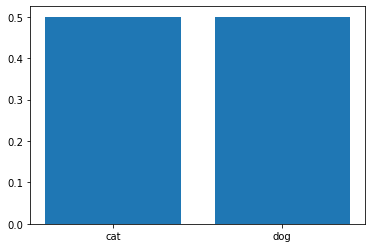

In [6]:
plt.bar(['cat' , 'dog'],[cat/total_size,dog/total_size])

# Spliting into Train Validation and Test

In [7]:
train_size = int(0.7*total_size)
validation_size = int(0.1*total_size)
test_size = int(0.2*total_size)

train_data = total_ds.take(train_size)
val_data = total_ds.skip(train_size).take(validation_size)
test_data = total_ds.skip(train_size).skip(validation_size)

print("Train Sample: ", len(train_data), "Validation Sample: ",len(val_data), "Test Sample: ", len(test_data))
print("The proportion are :Train Sample: ", len(train_data)/total_size, "Validation Sample: ",len(val_data)/total_size, "Test Sample: ", len(test_data)/total_size)

Train Sample:  17479 Validation Sample:  2497 Test Sample:  4994
The proportion are :Train Sample:  0.7 Validation Sample:  0.1 Test Sample:  0.2


In [8]:
sets = [train_data, val_data,test_data]
i=0
cat = 0
dog = 0
counter = []
for sets in sets:
    print("Counting set")
    for images, labels in sets.take(len(sets)):
        print(total_ds.class_names[labels], i)
        if total_ds.class_names[labels] == 'Cat':
            cat += 1
        if total_ds.class_names[labels] == 'Dog':
            dog += 1
        i+=1
    counter.append(cat)
    counter.append(dog)
    i=0
    cat = 0
    dog = 0

print (cat , dog)

Counting set
Cat 0
Dog 1
Cat 2
Cat 3
Dog 4
Cat 5
Dog 6
Cat 7
Cat 8
Dog 9
Cat 10
Dog 11
Dog 12
Dog 13
Dog 14
Cat 15
Cat 16
Cat 17
Cat 18
Dog 19
Dog 20
Dog 21
Dog 22
Cat 23
Cat 24
Cat 25
Dog 26
Cat 27
Cat 28
Cat 29
Dog 30
Cat 31
Dog 32
Dog 33
Cat 34
Cat 35
Cat 36
Cat 37
Dog 38
Dog 39
Dog 40
Dog 41
Dog 42
Dog 43
Cat 44
Cat 45
Dog 46
Cat 47
Dog 48
Dog 49
Cat 50
Cat 51
Dog 52
Cat 53
Cat 54
Cat 55
Cat 56
Cat 57
Dog 58
Cat 59
Cat 60
Dog 61
Cat 62
Dog 63
Cat 64
Cat 65
Cat 66
Dog 67
Dog 68
Dog 69
Cat 70
Dog 71
Cat 72
Cat 73
Cat 74
Cat 75
Dog 76
Dog 77
Dog 78
Cat 79
Cat 80
Dog 81
Cat 82
Cat 83
Dog 84
Cat 85
Cat 86
Cat 87
Cat 88
Dog 89
Cat 90
Dog 91
Cat 92
Cat 93
Dog 94
Dog 95
Cat 96
Dog 97
Cat 98
Cat 99
Dog 100
Dog 101
Cat 102
Dog 103
Cat 104
Dog 105
Dog 106
Cat 107
Cat 108
Cat 109
Dog 110
Cat 111
Cat 112
Dog 113
Cat 114
Dog 115
Dog 116
Dog 117
Dog 118
Cat 119
Cat 120
Dog 121
Dog 122
Cat 123
Dog 124
Cat 125
Dog 126
Dog 127
Dog 128
Cat 129
Cat 130
Cat 131
Cat 132
Dog 133
Dog 134
Cat 135
Cat 136
C

Cat 1169
Dog 1170
Cat 1171
Dog 1172
Dog 1173
Cat 1174
Cat 1175
Dog 1176
Cat 1177
Cat 1178
Dog 1179
Cat 1180
Dog 1181
Dog 1182
Cat 1183
Cat 1184
Cat 1185
Cat 1186
Dog 1187
Dog 1188
Cat 1189
Dog 1190
Dog 1191
Dog 1192
Cat 1193
Dog 1194
Cat 1195
Dog 1196
Dog 1197
Cat 1198
Dog 1199
Dog 1200
Cat 1201
Cat 1202
Cat 1203
Dog 1204
Cat 1205
Cat 1206
Cat 1207
Cat 1208
Dog 1209
Dog 1210
Cat 1211
Dog 1212
Dog 1213
Dog 1214
Cat 1215
Dog 1216
Dog 1217
Dog 1218
Cat 1219
Dog 1220
Dog 1221
Cat 1222
Cat 1223
Cat 1224
Cat 1225
Cat 1226
Cat 1227
Dog 1228
Cat 1229
Dog 1230
Cat 1231
Cat 1232
Dog 1233
Dog 1234
Cat 1235
Cat 1236
Dog 1237
Cat 1238
Dog 1239
Dog 1240
Cat 1241
Dog 1242
Dog 1243
Cat 1244
Cat 1245
Dog 1246
Cat 1247
Cat 1248
Dog 1249
Cat 1250
Dog 1251
Dog 1252
Cat 1253
Dog 1254
Dog 1255
Dog 1256
Dog 1257
Cat 1258
Dog 1259
Dog 1260
Cat 1261
Cat 1262
Cat 1263
Cat 1264
Cat 1265
Dog 1266
Dog 1267
Dog 1268
Cat 1269
Dog 1270
Cat 1271
Cat 1272
Dog 1273
Dog 1274
Cat 1275
Dog 1276
Dog 1277
Cat 1278
Cat 1279
C

Cat 2116
Dog 2117
Dog 2118
Cat 2119
Dog 2120
Cat 2121
Dog 2122
Dog 2123
Cat 2124
Dog 2125
Dog 2126
Cat 2127
Dog 2128
Cat 2129
Cat 2130
Cat 2131
Dog 2132
Dog 2133
Dog 2134
Dog 2135
Cat 2136
Cat 2137
Cat 2138
Dog 2139
Cat 2140
Cat 2141
Dog 2142
Cat 2143
Dog 2144
Cat 2145
Cat 2146
Dog 2147
Cat 2148
Dog 2149
Dog 2150
Dog 2151
Cat 2152
Cat 2153
Cat 2154
Dog 2155
Dog 2156
Cat 2157
Dog 2158
Dog 2159
Dog 2160
Dog 2161
Cat 2162
Cat 2163
Cat 2164
Cat 2165
Cat 2166
Dog 2167
Cat 2168
Cat 2169
Cat 2170
Dog 2171
Dog 2172
Cat 2173
Cat 2174
Cat 2175
Cat 2176
Dog 2177
Cat 2178
Cat 2179
Cat 2180
Cat 2181
Dog 2182
Cat 2183
Cat 2184
Cat 2185
Dog 2186
Cat 2187
Cat 2188
Cat 2189
Dog 2190
Dog 2191
Dog 2192
Cat 2193
Cat 2194
Cat 2195
Cat 2196
Cat 2197
Dog 2198
Cat 2199
Cat 2200
Dog 2201
Cat 2202
Cat 2203
Cat 2204
Dog 2205
Cat 2206
Cat 2207
Dog 2208
Dog 2209
Cat 2210
Cat 2211
Cat 2212
Cat 2213
Cat 2214
Cat 2215
Dog 2216
Cat 2217
Dog 2218
Cat 2219
Cat 2220
Dog 2221
Dog 2222
Dog 2223
Cat 2224
Cat 2225
Cat 2226
D

Cat 3077
Dog 3078
Cat 3079
Cat 3080
Dog 3081
Cat 3082
Dog 3083
Dog 3084
Cat 3085
Dog 3086
Cat 3087
Cat 3088
Cat 3089
Cat 3090
Dog 3091
Dog 3092
Cat 3093
Cat 3094
Dog 3095
Cat 3096
Cat 3097
Dog 3098
Cat 3099
Cat 3100
Cat 3101
Dog 3102
Cat 3103
Dog 3104
Dog 3105
Dog 3106
Cat 3107
Cat 3108
Cat 3109
Cat 3110
Cat 3111
Dog 3112
Dog 3113
Dog 3114
Dog 3115
Cat 3116
Cat 3117
Dog 3118
Cat 3119
Cat 3120
Cat 3121
Cat 3122
Dog 3123
Dog 3124
Cat 3125
Dog 3126
Cat 3127
Cat 3128
Dog 3129
Cat 3130
Cat 3131
Cat 3132
Cat 3133
Cat 3134
Cat 3135
Cat 3136
Cat 3137
Dog 3138
Dog 3139
Cat 3140
Cat 3141
Dog 3142
Cat 3143
Cat 3144
Cat 3145
Dog 3146
Cat 3147
Dog 3148
Dog 3149
Cat 3150
Cat 3151
Cat 3152
Cat 3153
Dog 3154
Dog 3155
Dog 3156
Dog 3157
Dog 3158
Cat 3159
Dog 3160
Dog 3161
Dog 3162
Dog 3163
Dog 3164
Cat 3165
Dog 3166
Dog 3167
Cat 3168
Dog 3169
Cat 3170
Cat 3171
Dog 3172
Dog 3173
Cat 3174
Cat 3175
Cat 3176
Dog 3177
Dog 3178
Dog 3179
Cat 3180
Cat 3181
Cat 3182
Dog 3183
Cat 3184
Cat 3185
Cat 3186
Dog 3187
C

Dog 3988
Cat 3989
Cat 3990
Dog 3991
Dog 3992
Cat 3993
Cat 3994
Dog 3995
Dog 3996
Cat 3997
Dog 3998
Dog 3999
Dog 4000
Cat 4001
Cat 4002
Dog 4003
Dog 4004
Cat 4005
Dog 4006
Cat 4007
Dog 4008
Cat 4009
Dog 4010
Dog 4011
Cat 4012
Dog 4013
Dog 4014
Cat 4015
Cat 4016
Dog 4017
Dog 4018
Cat 4019
Dog 4020
Cat 4021
Cat 4022
Cat 4023
Cat 4024
Dog 4025
Cat 4026
Dog 4027
Dog 4028
Dog 4029
Cat 4030
Cat 4031
Cat 4032
Cat 4033
Cat 4034
Dog 4035
Dog 4036
Dog 4037
Cat 4038
Cat 4039
Cat 4040
Dog 4041
Dog 4042
Dog 4043
Dog 4044
Dog 4045
Dog 4046
Dog 4047
Cat 4048
Dog 4049
Cat 4050
Cat 4051
Dog 4052
Cat 4053
Cat 4054
Cat 4055
Cat 4056
Dog 4057
Dog 4058
Cat 4059
Dog 4060
Cat 4061
Cat 4062
Cat 4063
Dog 4064
Dog 4065
Cat 4066
Cat 4067
Cat 4068
Cat 4069
Cat 4070
Dog 4071
Dog 4072
Dog 4073
Cat 4074
Cat 4075
Dog 4076
Cat 4077
Dog 4078
Dog 4079
Cat 4080
Dog 4081
Dog 4082
Cat 4083
Cat 4084
Dog 4085
Dog 4086
Cat 4087
Dog 4088
Dog 4089
Dog 4090
Dog 4091
Cat 4092
Dog 4093
Dog 4094
Dog 4095
Dog 4096
Cat 4097
Dog 4098
D

Cat 5029
Dog 5030
Cat 5031
Cat 5032
Dog 5033
Dog 5034
Dog 5035
Dog 5036
Cat 5037
Cat 5038
Cat 5039
Dog 5040
Cat 5041
Dog 5042
Cat 5043
Cat 5044
Dog 5045
Dog 5046
Cat 5047
Cat 5048
Cat 5049
Cat 5050
Cat 5051
Dog 5052
Cat 5053
Dog 5054
Dog 5055
Cat 5056
Dog 5057
Cat 5058
Cat 5059
Dog 5060
Dog 5061
Cat 5062
Dog 5063
Cat 5064
Cat 5065
Dog 5066
Cat 5067
Cat 5068
Dog 5069
Dog 5070
Dog 5071
Dog 5072
Dog 5073
Dog 5074
Cat 5075
Cat 5076
Cat 5077
Cat 5078
Cat 5079
Dog 5080
Dog 5081
Cat 5082
Dog 5083
Dog 5084
Cat 5085
Cat 5086
Cat 5087
Cat 5088
Dog 5089
Cat 5090
Dog 5091
Dog 5092
Cat 5093
Dog 5094
Dog 5095
Dog 5096
Cat 5097
Cat 5098
Cat 5099
Dog 5100
Cat 5101
Dog 5102
Dog 5103
Cat 5104
Dog 5105
Cat 5106
Cat 5107
Dog 5108
Dog 5109
Dog 5110
Dog 5111
Cat 5112
Cat 5113
Dog 5114
Dog 5115
Dog 5116
Dog 5117
Cat 5118
Cat 5119
Dog 5120
Dog 5121
Cat 5122
Cat 5123
Dog 5124
Dog 5125
Dog 5126
Cat 5127
Cat 5128
Cat 5129
Dog 5130
Cat 5131
Cat 5132
Cat 5133
Cat 5134
Cat 5135
Cat 5136
Cat 5137
Dog 5138
Cat 5139
C

Cat 6087
Cat 6088
Cat 6089
Cat 6090
Cat 6091
Cat 6092
Dog 6093
Cat 6094
Cat 6095
Cat 6096
Dog 6097
Dog 6098
Dog 6099
Cat 6100
Dog 6101
Dog 6102
Cat 6103
Dog 6104
Cat 6105
Dog 6106
Dog 6107
Dog 6108
Dog 6109
Cat 6110
Cat 6111
Cat 6112
Dog 6113
Dog 6114
Cat 6115
Cat 6116
Dog 6117
Dog 6118
Cat 6119
Dog 6120
Dog 6121
Dog 6122
Cat 6123
Dog 6124
Cat 6125
Cat 6126
Cat 6127
Cat 6128
Dog 6129
Cat 6130
Cat 6131
Cat 6132
Cat 6133
Cat 6134
Dog 6135
Cat 6136
Dog 6137
Cat 6138
Dog 6139
Dog 6140
Cat 6141
Dog 6142
Dog 6143
Cat 6144
Cat 6145
Cat 6146
Dog 6147
Cat 6148
Cat 6149
Dog 6150
Cat 6151
Dog 6152
Dog 6153
Dog 6154
Dog 6155
Dog 6156
Cat 6157
Cat 6158
Dog 6159
Dog 6160
Cat 6161
Dog 6162
Cat 6163
Cat 6164
Dog 6165
Dog 6166
Cat 6167
Dog 6168
Cat 6169
Dog 6170
Cat 6171
Dog 6172
Cat 6173
Dog 6174
Dog 6175
Dog 6176
Dog 6177
Cat 6178
Dog 6179
Dog 6180
Dog 6181
Cat 6182
Dog 6183
Dog 6184
Dog 6185
Cat 6186
Cat 6187
Cat 6188
Dog 6189
Cat 6190
Cat 6191
Dog 6192
Dog 6193
Cat 6194
Cat 6195
Dog 6196
Cat 6197
C

Cat 7086
Dog 7087
Dog 7088
Cat 7089
Dog 7090
Dog 7091
Cat 7092
Cat 7093
Dog 7094
Cat 7095
Cat 7096
Cat 7097
Cat 7098
Cat 7099
Dog 7100
Dog 7101
Dog 7102
Dog 7103
Cat 7104
Dog 7105
Dog 7106
Dog 7107
Cat 7108
Cat 7109
Dog 7110
Dog 7111
Cat 7112
Cat 7113
Dog 7114
Cat 7115
Dog 7116
Dog 7117
Dog 7118
Dog 7119
Cat 7120
Cat 7121
Cat 7122
Cat 7123
Dog 7124
Dog 7125
Cat 7126
Dog 7127
Cat 7128
Dog 7129
Dog 7130
Cat 7131
Dog 7132
Dog 7133
Cat 7134
Cat 7135
Dog 7136
Cat 7137
Dog 7138
Dog 7139
Dog 7140
Dog 7141
Cat 7142
Cat 7143
Cat 7144
Cat 7145
Cat 7146
Cat 7147
Cat 7148
Dog 7149
Dog 7150
Cat 7151
Cat 7152
Dog 7153
Dog 7154
Dog 7155
Cat 7156
Cat 7157
Cat 7158
Cat 7159
Cat 7160
Cat 7161
Cat 7162
Dog 7163
Cat 7164
Dog 7165
Dog 7166
Dog 7167
Cat 7168
Cat 7169
Dog 7170
Cat 7171
Dog 7172
Cat 7173
Dog 7174
Dog 7175
Dog 7176
Cat 7177
Cat 7178
Cat 7179
Dog 7180
Cat 7181
Cat 7182
Dog 7183
Cat 7184
Dog 7185
Cat 7186
Cat 7187
Dog 7188
Cat 7189
Dog 7190
Dog 7191
Dog 7192
Dog 7193
Dog 7194
Cat 7195
Cat 7196
C

Cat 8071
Cat 8072
Cat 8073
Cat 8074
Cat 8075
Cat 8076
Dog 8077
Cat 8078
Dog 8079
Dog 8080
Cat 8081
Cat 8082
Cat 8083
Cat 8084
Dog 8085
Cat 8086
Cat 8087
Cat 8088
Cat 8089
Cat 8090
Dog 8091
Dog 8092
Cat 8093
Dog 8094
Dog 8095
Dog 8096
Cat 8097
Cat 8098
Cat 8099
Cat 8100
Dog 8101
Dog 8102
Cat 8103
Dog 8104
Dog 8105
Dog 8106
Dog 8107
Cat 8108
Dog 8109
Dog 8110
Dog 8111
Cat 8112
Cat 8113
Cat 8114
Cat 8115
Cat 8116
Cat 8117
Cat 8118
Dog 8119
Cat 8120
Dog 8121
Cat 8122
Dog 8123
Dog 8124
Dog 8125
Cat 8126
Dog 8127
Cat 8128
Dog 8129
Cat 8130
Cat 8131
Dog 8132
Cat 8133
Cat 8134
Cat 8135
Dog 8136
Cat 8137
Cat 8138
Cat 8139
Dog 8140
Dog 8141
Dog 8142
Cat 8143
Dog 8144
Cat 8145
Dog 8146
Dog 8147
Dog 8148
Cat 8149
Cat 8150
Cat 8151
Dog 8152
Cat 8153
Cat 8154
Dog 8155
Cat 8156
Cat 8157
Cat 8158
Cat 8159
Dog 8160
Dog 8161
Cat 8162
Cat 8163
Dog 8164
Dog 8165
Cat 8166
Cat 8167
Dog 8168
Cat 8169
Dog 8170
Cat 8171
Cat 8172
Cat 8173
Cat 8174
Cat 8175
Cat 8176
Dog 8177
Cat 8178
Cat 8179
Cat 8180
Dog 8181
C

Dog 9098
Cat 9099
Dog 9100
Cat 9101
Dog 9102
Cat 9103
Cat 9104
Dog 9105
Dog 9106
Cat 9107
Dog 9108
Cat 9109
Dog 9110
Dog 9111
Cat 9112
Dog 9113
Dog 9114
Cat 9115
Dog 9116
Cat 9117
Dog 9118
Cat 9119
Cat 9120
Dog 9121
Cat 9122
Cat 9123
Dog 9124
Dog 9125
Dog 9126
Dog 9127
Dog 9128
Dog 9129
Cat 9130
Dog 9131
Cat 9132
Dog 9133
Dog 9134
Cat 9135
Dog 9136
Dog 9137
Cat 9138
Cat 9139
Cat 9140
Dog 9141
Dog 9142
Cat 9143
Cat 9144
Dog 9145
Dog 9146
Dog 9147
Dog 9148
Cat 9149
Dog 9150
Cat 9151
Cat 9152
Cat 9153
Dog 9154
Cat 9155
Cat 9156
Cat 9157
Dog 9158
Dog 9159
Dog 9160
Cat 9161
Cat 9162
Dog 9163
Cat 9164
Dog 9165
Cat 9166
Dog 9167
Dog 9168
Dog 9169
Dog 9170
Cat 9171
Cat 9172
Dog 9173
Cat 9174
Dog 9175
Cat 9176
Cat 9177
Cat 9178
Dog 9179
Cat 9180
Dog 9181
Dog 9182
Dog 9183
Dog 9184
Cat 9185
Cat 9186
Cat 9187
Dog 9188
Dog 9189
Cat 9190
Cat 9191
Dog 9192
Cat 9193
Cat 9194
Cat 9195
Cat 9196
Dog 9197
Dog 9198
Dog 9199
Dog 9200
Cat 9201
Dog 9202
Cat 9203
Cat 9204
Dog 9205
Dog 9206
Cat 9207
Cat 9208
D

Dog 10124
Dog 10125
Dog 10126
Dog 10127
Dog 10128
Dog 10129
Dog 10130
Cat 10131
Dog 10132
Dog 10133
Dog 10134
Dog 10135
Dog 10136
Dog 10137
Dog 10138
Dog 10139
Dog 10140
Cat 10141
Dog 10142
Dog 10143
Dog 10144
Dog 10145
Dog 10146
Dog 10147
Dog 10148
Cat 10149
Dog 10150
Cat 10151
Dog 10152
Cat 10153
Dog 10154
Cat 10155
Cat 10156
Cat 10157
Dog 10158
Dog 10159
Cat 10160
Cat 10161
Cat 10162
Dog 10163
Dog 10164
Cat 10165
Dog 10166
Dog 10167
Cat 10168
Cat 10169
Dog 10170
Cat 10171
Cat 10172
Dog 10173
Dog 10174
Cat 10175
Cat 10176
Cat 10177
Cat 10178
Cat 10179
Dog 10180
Cat 10181
Cat 10182
Dog 10183
Dog 10184
Dog 10185
Cat 10186
Cat 10187
Dog 10188
Cat 10189
Dog 10190
Cat 10191
Cat 10192
Cat 10193
Cat 10194
Cat 10195
Dog 10196
Dog 10197
Dog 10198
Cat 10199
Dog 10200
Cat 10201
Dog 10202
Cat 10203
Dog 10204
Cat 10205
Cat 10206
Dog 10207
Cat 10208
Dog 10209
Cat 10210
Cat 10211
Dog 10212
Cat 10213
Cat 10214
Cat 10215
Dog 10216
Cat 10217
Cat 10218
Cat 10219
Cat 10220
Dog 10221
Cat 10222
Dog 10223


Cat 10957
Dog 10958
Cat 10959
Cat 10960
Dog 10961
Cat 10962
Cat 10963
Dog 10964
Dog 10965
Dog 10966
Cat 10967
Dog 10968
Cat 10969
Dog 10970
Cat 10971
Cat 10972
Cat 10973
Dog 10974
Dog 10975
Cat 10976
Dog 10977
Cat 10978
Dog 10979
Dog 10980
Cat 10981
Dog 10982
Cat 10983
Cat 10984
Cat 10985
Dog 10986
Dog 10987
Cat 10988
Dog 10989
Cat 10990
Dog 10991
Dog 10992
Cat 10993
Dog 10994
Cat 10995
Dog 10996
Dog 10997
Cat 10998
Cat 10999
Dog 11000
Cat 11001
Cat 11002
Dog 11003
Dog 11004
Dog 11005
Cat 11006
Dog 11007
Dog 11008
Cat 11009
Dog 11010
Cat 11011
Cat 11012
Cat 11013
Cat 11014
Cat 11015
Dog 11016
Cat 11017
Cat 11018
Dog 11019
Dog 11020
Cat 11021
Cat 11022
Dog 11023
Cat 11024
Dog 11025
Dog 11026
Dog 11027
Cat 11028
Cat 11029
Cat 11030
Dog 11031
Cat 11032
Cat 11033
Dog 11034
Dog 11035
Dog 11036
Dog 11037
Dog 11038
Dog 11039
Dog 11040
Cat 11041
Dog 11042
Cat 11043
Cat 11044
Cat 11045
Dog 11046
Cat 11047
Cat 11048
Cat 11049
Dog 11050
Dog 11051
Dog 11052
Dog 11053
Cat 11054
Dog 11055
Dog 11056


Dog 11865
Cat 11866
Cat 11867
Dog 11868
Cat 11869
Dog 11870
Cat 11871
Dog 11872
Dog 11873
Dog 11874
Dog 11875
Cat 11876
Cat 11877
Dog 11878
Dog 11879
Cat 11880
Cat 11881
Cat 11882
Dog 11883
Dog 11884
Dog 11885
Cat 11886
Dog 11887
Cat 11888
Cat 11889
Cat 11890
Cat 11891
Cat 11892
Dog 11893
Dog 11894
Dog 11895
Cat 11896
Cat 11897
Dog 11898
Cat 11899
Cat 11900
Dog 11901
Cat 11902
Dog 11903
Cat 11904
Dog 11905
Cat 11906
Dog 11907
Dog 11908
Cat 11909
Cat 11910
Dog 11911
Dog 11912
Dog 11913
Dog 11914
Cat 11915
Cat 11916
Dog 11917
Dog 11918
Dog 11919
Dog 11920
Dog 11921
Dog 11922
Dog 11923
Dog 11924
Cat 11925
Dog 11926
Dog 11927
Cat 11928
Dog 11929
Cat 11930
Dog 11931
Dog 11932
Dog 11933
Cat 11934
Cat 11935
Cat 11936
Cat 11937
Cat 11938
Dog 11939
Cat 11940
Dog 11941
Dog 11942
Dog 11943
Cat 11944
Dog 11945
Cat 11946
Cat 11947
Cat 11948
Dog 11949
Cat 11950
Dog 11951
Dog 11952
Dog 11953
Cat 11954
Dog 11955
Cat 11956
Cat 11957
Dog 11958
Cat 11959
Cat 11960
Dog 11961
Cat 11962
Dog 11963
Dog 11964


Cat 12770
Cat 12771
Cat 12772
Cat 12773
Cat 12774
Cat 12775
Dog 12776
Dog 12777
Cat 12778
Dog 12779
Dog 12780
Cat 12781
Cat 12782
Dog 12783
Dog 12784
Dog 12785
Cat 12786
Dog 12787
Dog 12788
Dog 12789
Dog 12790
Cat 12791
Cat 12792
Cat 12793
Cat 12794
Cat 12795
Cat 12796
Dog 12797
Cat 12798
Dog 12799
Dog 12800
Dog 12801
Cat 12802
Dog 12803
Cat 12804
Dog 12805
Cat 12806
Cat 12807
Dog 12808
Cat 12809
Dog 12810
Dog 12811
Dog 12812
Dog 12813
Dog 12814
Dog 12815
Cat 12816
Dog 12817
Dog 12818
Dog 12819
Cat 12820
Dog 12821
Dog 12822
Cat 12823
Dog 12824
Cat 12825
Dog 12826
Dog 12827
Cat 12828
Cat 12829
Dog 12830
Cat 12831
Dog 12832
Cat 12833
Cat 12834
Dog 12835
Dog 12836
Dog 12837
Dog 12838
Cat 12839
Cat 12840
Dog 12841
Cat 12842
Dog 12843
Cat 12844
Cat 12845
Dog 12846
Dog 12847
Cat 12848
Cat 12849
Dog 12850
Dog 12851
Cat 12852
Dog 12853
Dog 12854
Dog 12855
Dog 12856
Cat 12857
Dog 12858
Dog 12859
Dog 12860
Cat 12861
Dog 12862
Cat 12863
Dog 12864
Dog 12865
Dog 12866
Cat 12867
Cat 12868
Dog 12869


Cat 13679
Cat 13680
Dog 13681
Dog 13682
Cat 13683
Dog 13684
Dog 13685
Dog 13686
Cat 13687
Dog 13688
Cat 13689
Cat 13690
Dog 13691
Cat 13692
Dog 13693
Dog 13694
Cat 13695
Cat 13696
Cat 13697
Cat 13698
Cat 13699
Cat 13700
Cat 13701
Dog 13702
Dog 13703
Cat 13704
Cat 13705
Dog 13706
Cat 13707
Dog 13708
Cat 13709
Dog 13710
Cat 13711
Cat 13712
Dog 13713
Cat 13714
Cat 13715
Cat 13716
Cat 13717
Dog 13718
Cat 13719
Cat 13720
Dog 13721
Cat 13722
Dog 13723
Dog 13724
Cat 13725
Dog 13726
Cat 13727
Cat 13728
Dog 13729
Cat 13730
Cat 13731
Dog 13732
Dog 13733
Dog 13734
Cat 13735
Dog 13736
Dog 13737
Dog 13738
Cat 13739
Dog 13740
Cat 13741
Dog 13742
Cat 13743
Cat 13744
Cat 13745
Cat 13746
Dog 13747
Cat 13748
Cat 13749
Cat 13750
Cat 13751
Cat 13752
Cat 13753
Dog 13754
Dog 13755
Dog 13756
Dog 13757
Cat 13758
Dog 13759
Cat 13760
Dog 13761
Cat 13762
Dog 13763
Dog 13764
Cat 13765
Dog 13766
Cat 13767
Dog 13768
Dog 13769
Dog 13770
Cat 13771
Cat 13772
Cat 13773
Dog 13774
Cat 13775
Cat 13776
Cat 13777
Cat 13778


Dog 14561
Dog 14562
Dog 14563
Cat 14564
Cat 14565
Dog 14566
Dog 14567
Dog 14568
Cat 14569
Dog 14570
Dog 14571
Dog 14572
Cat 14573
Cat 14574
Dog 14575
Dog 14576
Cat 14577
Cat 14578
Cat 14579
Cat 14580
Cat 14581
Cat 14582
Dog 14583
Dog 14584
Cat 14585
Dog 14586
Cat 14587
Cat 14588
Cat 14589
Cat 14590
Cat 14591
Cat 14592
Dog 14593
Cat 14594
Cat 14595
Dog 14596
Cat 14597
Dog 14598
Dog 14599
Dog 14600
Dog 14601
Cat 14602
Cat 14603
Dog 14604
Cat 14605
Cat 14606
Dog 14607
Cat 14608
Cat 14609
Cat 14610
Dog 14611
Cat 14612
Dog 14613
Cat 14614
Cat 14615
Cat 14616
Dog 14617
Cat 14618
Cat 14619
Dog 14620
Cat 14621
Dog 14622
Cat 14623
Cat 14624
Dog 14625
Cat 14626
Cat 14627
Cat 14628
Dog 14629
Cat 14630
Cat 14631
Dog 14632
Dog 14633
Dog 14634
Cat 14635
Dog 14636
Cat 14637
Dog 14638
Cat 14639
Cat 14640
Cat 14641
Dog 14642
Dog 14643
Cat 14644
Dog 14645
Dog 14646
Dog 14647
Cat 14648
Cat 14649
Dog 14650
Cat 14651
Dog 14652
Dog 14653
Cat 14654
Dog 14655
Dog 14656
Dog 14657
Dog 14658
Cat 14659
Dog 14660


Cat 15436
Cat 15437
Cat 15438
Dog 15439
Cat 15440
Dog 15441
Dog 15442
Cat 15443
Dog 15444
Dog 15445
Cat 15446
Cat 15447
Dog 15448
Dog 15449
Cat 15450
Cat 15451
Cat 15452
Dog 15453
Dog 15454
Cat 15455
Cat 15456
Dog 15457
Dog 15458
Dog 15459
Cat 15460
Cat 15461
Dog 15462
Cat 15463
Dog 15464
Cat 15465
Cat 15466
Dog 15467
Cat 15468
Dog 15469
Cat 15470
Dog 15471
Cat 15472
Dog 15473
Cat 15474
Cat 15475
Dog 15476
Cat 15477
Dog 15478
Cat 15479
Cat 15480
Cat 15481
Dog 15482
Dog 15483
Cat 15484
Cat 15485
Cat 15486
Cat 15487
Cat 15488
Dog 15489
Dog 15490
Cat 15491
Dog 15492
Cat 15493
Dog 15494
Cat 15495
Cat 15496
Dog 15497
Cat 15498
Cat 15499
Dog 15500
Cat 15501
Cat 15502
Cat 15503
Dog 15504
Cat 15505
Cat 15506
Dog 15507
Cat 15508
Cat 15509
Dog 15510
Dog 15511
Cat 15512
Cat 15513
Dog 15514
Cat 15515
Cat 15516
Cat 15517
Cat 15518
Dog 15519
Dog 15520
Cat 15521
Cat 15522
Cat 15523
Cat 15524
Cat 15525
Dog 15526
Cat 15527
Dog 15528
Dog 15529
Cat 15530
Cat 15531
Dog 15532
Dog 15533
Dog 15534
Dog 15535


Cat 16321
Cat 16322
Cat 16323
Dog 16324
Dog 16325
Dog 16326
Cat 16327
Cat 16328
Cat 16329
Cat 16330
Dog 16331
Cat 16332
Dog 16333
Cat 16334
Dog 16335
Cat 16336
Cat 16337
Cat 16338
Cat 16339
Dog 16340
Cat 16341
Dog 16342
Cat 16343
Dog 16344
Cat 16345
Cat 16346
Dog 16347
Cat 16348
Cat 16349
Cat 16350
Dog 16351
Dog 16352
Dog 16353
Cat 16354
Cat 16355
Cat 16356
Dog 16357
Cat 16358
Dog 16359
Dog 16360
Dog 16361
Dog 16362
Cat 16363
Dog 16364
Cat 16365
Dog 16366
Cat 16367
Cat 16368
Dog 16369
Cat 16370
Dog 16371
Cat 16372
Cat 16373
Dog 16374
Cat 16375
Cat 16376
Cat 16377
Cat 16378
Cat 16379
Dog 16380
Dog 16381
Dog 16382
Cat 16383
Cat 16384
Dog 16385
Cat 16386
Dog 16387
Cat 16388
Cat 16389
Cat 16390
Cat 16391
Cat 16392
Dog 16393
Cat 16394
Cat 16395
Cat 16396
Cat 16397
Dog 16398
Cat 16399
Dog 16400
Dog 16401
Cat 16402
Dog 16403
Cat 16404
Cat 16405
Cat 16406
Cat 16407
Dog 16408
Dog 16409
Cat 16410
Dog 16411
Dog 16412
Dog 16413
Cat 16414
Cat 16415
Cat 16416
Cat 16417
Cat 16418
Dog 16419
Dog 16420


Cat 17233
Dog 17234
Cat 17235
Cat 17236
Cat 17237
Dog 17238
Dog 17239
Cat 17240
Dog 17241
Dog 17242
Dog 17243
Cat 17244
Cat 17245
Cat 17246
Dog 17247
Dog 17248
Cat 17249
Dog 17250
Cat 17251
Dog 17252
Dog 17253
Dog 17254
Cat 17255
Dog 17256
Cat 17257
Cat 17258
Cat 17259
Dog 17260
Dog 17261
Dog 17262
Dog 17263
Dog 17264
Dog 17265
Cat 17266
Cat 17267
Dog 17268
Dog 17269
Cat 17270
Dog 17271
Dog 17272
Cat 17273
Dog 17274
Dog 17275
Cat 17276
Cat 17277
Cat 17278
Cat 17279
Cat 17280
Dog 17281
Cat 17282
Cat 17283
Cat 17284
Dog 17285
Dog 17286
Dog 17287
Cat 17288
Dog 17289
Dog 17290
Cat 17291
Dog 17292
Dog 17293
Dog 17294
Dog 17295
Cat 17296
Dog 17297
Dog 17298
Cat 17299
Dog 17300
Dog 17301
Dog 17302
Cat 17303
Cat 17304
Cat 17305
Dog 17306
Cat 17307
Cat 17308
Dog 17309
Dog 17310
Cat 17311
Cat 17312
Cat 17313
Cat 17314
Dog 17315
Cat 17316
Dog 17317
Cat 17318
Cat 17319
Cat 17320
Dog 17321
Cat 17322
Cat 17323
Cat 17324
Cat 17325
Cat 17326
Cat 17327
Cat 17328
Dog 17329
Dog 17330
Cat 17331
Dog 17332


Cat 753
Cat 754
Cat 755
Cat 756
Cat 757
Dog 758
Dog 759
Dog 760
Dog 761
Dog 762
Dog 763
Dog 764
Cat 765
Cat 766
Cat 767
Dog 768
Cat 769
Dog 770
Cat 771
Cat 772
Dog 773
Dog 774
Dog 775
Dog 776
Dog 777
Cat 778
Dog 779
Cat 780
Dog 781
Cat 782
Cat 783
Dog 784
Dog 785
Cat 786
Dog 787
Dog 788
Cat 789
Cat 790
Cat 791
Dog 792
Dog 793
Cat 794
Dog 795
Dog 796
Dog 797
Dog 798
Dog 799
Dog 800
Dog 801
Dog 802
Dog 803
Cat 804
Cat 805
Dog 806
Cat 807
Cat 808
Dog 809
Cat 810
Cat 811
Dog 812
Dog 813
Cat 814
Dog 815
Dog 816
Cat 817
Cat 818
Cat 819
Cat 820
Dog 821
Dog 822
Cat 823
Cat 824
Cat 825
Cat 826
Cat 827
Dog 828
Cat 829
Cat 830
Cat 831
Cat 832
Cat 833
Cat 834
Cat 835
Cat 836
Cat 837
Cat 838
Cat 839
Cat 840
Cat 841
Cat 842
Cat 843
Dog 844
Dog 845
Cat 846
Cat 847
Cat 848
Cat 849
Dog 850
Cat 851
Cat 852
Cat 853
Dog 854
Cat 855
Dog 856
Cat 857
Dog 858
Cat 859
Dog 860
Dog 861
Dog 862
Dog 863
Cat 864
Cat 865
Dog 866
Cat 867
Cat 868
Cat 869
Cat 870
Dog 871
Dog 872
Cat 873
Cat 874
Cat 875
Cat 876
Dog 877


Dog 1821
Cat 1822
Cat 1823
Cat 1824
Cat 1825
Dog 1826
Cat 1827
Dog 1828
Dog 1829
Cat 1830
Cat 1831
Cat 1832
Cat 1833
Dog 1834
Cat 1835
Dog 1836
Dog 1837
Cat 1838
Cat 1839
Cat 1840
Dog 1841
Cat 1842
Cat 1843
Cat 1844
Cat 1845
Dog 1846
Dog 1847
Cat 1848
Dog 1849
Cat 1850
Dog 1851
Cat 1852
Dog 1853
Cat 1854
Dog 1855
Dog 1856
Dog 1857
Dog 1858
Dog 1859
Dog 1860
Cat 1861
Cat 1862
Cat 1863
Dog 1864
Cat 1865
Cat 1866
Dog 1867
Dog 1868
Cat 1869
Cat 1870
Cat 1871
Cat 1872
Cat 1873
Cat 1874
Dog 1875
Dog 1876
Dog 1877
Dog 1878
Cat 1879
Dog 1880
Cat 1881
Dog 1882
Dog 1883
Dog 1884
Cat 1885
Dog 1886
Dog 1887
Cat 1888
Dog 1889
Dog 1890
Cat 1891
Dog 1892
Cat 1893
Cat 1894
Dog 1895
Dog 1896
Cat 1897
Cat 1898
Cat 1899
Cat 1900
Cat 1901
Dog 1902
Dog 1903
Dog 1904
Dog 1905
Cat 1906
Dog 1907
Cat 1908
Cat 1909
Cat 1910
Cat 1911
Dog 1912
Cat 1913
Dog 1914
Cat 1915
Dog 1916
Dog 1917
Cat 1918
Dog 1919
Dog 1920
Cat 1921
Dog 1922
Dog 1923
Cat 1924
Cat 1925
Dog 1926
Dog 1927
Dog 1928
Cat 1929
Dog 1930
Dog 1931
D

Cat 302
Cat 303
Cat 304
Cat 305
Dog 306
Dog 307
Dog 308
Dog 309
Dog 310
Cat 311
Cat 312
Dog 313
Cat 314
Dog 315
Dog 316
Dog 317
Dog 318
Dog 319
Dog 320
Dog 321
Cat 322
Cat 323
Dog 324
Dog 325
Cat 326
Dog 327
Cat 328
Dog 329
Cat 330
Cat 331
Dog 332
Dog 333
Dog 334
Dog 335
Dog 336
Cat 337
Dog 338
Cat 339
Dog 340
Dog 341
Cat 342
Dog 343
Dog 344
Cat 345
Cat 346
Dog 347
Dog 348
Cat 349
Cat 350
Cat 351
Dog 352
Cat 353
Dog 354
Dog 355
Cat 356
Cat 357
Cat 358
Dog 359
Cat 360
Dog 361
Cat 362
Cat 363
Cat 364
Cat 365
Cat 366
Dog 367
Cat 368
Dog 369
Cat 370
Dog 371
Dog 372
Cat 373
Cat 374
Cat 375
Dog 376
Dog 377
Cat 378
Dog 379
Cat 380
Cat 381
Dog 382
Dog 383
Dog 384
Dog 385
Cat 386
Dog 387
Cat 388
Dog 389
Cat 390
Dog 391
Cat 392
Cat 393
Cat 394
Cat 395
Cat 396
Cat 397
Dog 398
Dog 399
Dog 400
Cat 401
Cat 402
Cat 403
Dog 404
Dog 405
Cat 406
Cat 407
Cat 408
Cat 409
Cat 410
Dog 411
Dog 412
Dog 413
Cat 414
Cat 415
Dog 416
Dog 417
Cat 418
Cat 419
Dog 420
Dog 421
Cat 422
Cat 423
Cat 424
Cat 425
Dog 426


Dog 1300
Cat 1301
Dog 1302
Cat 1303
Dog 1304
Cat 1305
Cat 1306
Cat 1307
Dog 1308
Cat 1309
Cat 1310
Cat 1311
Dog 1312
Dog 1313
Cat 1314
Dog 1315
Dog 1316
Dog 1317
Cat 1318
Cat 1319
Dog 1320
Dog 1321
Dog 1322
Cat 1323
Cat 1324
Dog 1325
Cat 1326
Dog 1327
Dog 1328
Dog 1329
Dog 1330
Cat 1331
Cat 1332
Dog 1333
Dog 1334
Cat 1335
Cat 1336
Dog 1337
Cat 1338
Dog 1339
Cat 1340
Cat 1341
Dog 1342
Cat 1343
Cat 1344
Dog 1345
Dog 1346
Dog 1347
Cat 1348
Cat 1349
Dog 1350
Cat 1351
Dog 1352
Dog 1353
Dog 1354
Dog 1355
Dog 1356
Cat 1357
Cat 1358
Cat 1359
Dog 1360
Cat 1361
Cat 1362
Cat 1363
Dog 1364
Dog 1365
Cat 1366
Dog 1367
Cat 1368
Cat 1369
Cat 1370
Dog 1371
Cat 1372
Cat 1373
Cat 1374
Cat 1375
Dog 1376
Cat 1377
Dog 1378
Dog 1379
Dog 1380
Dog 1381
Cat 1382
Cat 1383
Cat 1384
Cat 1385
Cat 1386
Dog 1387
Dog 1388
Cat 1389
Cat 1390
Cat 1391
Dog 1392
Cat 1393
Cat 1394
Cat 1395
Cat 1396
Dog 1397
Dog 1398
Dog 1399
Cat 1400
Dog 1401
Cat 1402
Dog 1403
Cat 1404
Dog 1405
Dog 1406
Dog 1407
Cat 1408
Dog 1409
Dog 1410
D

Cat 2286
Cat 2287
Cat 2288
Dog 2289
Dog 2290
Dog 2291
Dog 2292
Cat 2293
Cat 2294
Cat 2295
Cat 2296
Cat 2297
Cat 2298
Dog 2299
Cat 2300
Dog 2301
Dog 2302
Dog 2303
Dog 2304
Cat 2305
Cat 2306
Cat 2307
Cat 2308
Cat 2309
Cat 2310
Cat 2311
Cat 2312
Dog 2313
Cat 2314
Dog 2315
Dog 2316
Cat 2317
Cat 2318
Dog 2319
Cat 2320
Cat 2321
Cat 2322
Dog 2323
Cat 2324
Cat 2325
Dog 2326
Dog 2327
Dog 2328
Dog 2329
Cat 2330
Dog 2331
Dog 2332
Dog 2333
Cat 2334
Cat 2335
Cat 2336
Dog 2337
Cat 2338
Dog 2339
Dog 2340
Dog 2341
Cat 2342
Dog 2343
Cat 2344
Cat 2345
Dog 2346
Dog 2347
Cat 2348
Dog 2349
Cat 2350
Dog 2351
Dog 2352
Dog 2353
Cat 2354
Cat 2355
Dog 2356
Cat 2357
Cat 2358
Cat 2359
Cat 2360
Cat 2361
Cat 2362
Dog 2363
Cat 2364
Cat 2365
Dog 2366
Cat 2367
Dog 2368
Cat 2369
Dog 2370
Dog 2371
Cat 2372
Dog 2373
Cat 2374
Dog 2375
Dog 2376
Dog 2377
Cat 2378
Cat 2379
Dog 2380
Cat 2381
Cat 2382
Dog 2383
Cat 2384
Dog 2385
Dog 2386
Dog 2387
Cat 2388
Cat 2389
Cat 2390
Cat 2391
Dog 2392
Cat 2393
Cat 2394
Dog 2395
Cat 2396
D

Cat 3287
Cat 3288
Cat 3289
Dog 3290
Dog 3291
Cat 3292
Cat 3293
Cat 3294
Dog 3295
Dog 3296
Dog 3297
Dog 3298
Dog 3299
Dog 3300
Dog 3301
Cat 3302
Cat 3303
Cat 3304
Dog 3305
Cat 3306
Dog 3307
Cat 3308
Cat 3309
Dog 3310
Dog 3311
Cat 3312
Cat 3313
Cat 3314
Cat 3315
Cat 3316
Cat 3317
Dog 3318
Cat 3319
Cat 3320
Cat 3321
Dog 3322
Cat 3323
Cat 3324
Dog 3325
Dog 3326
Cat 3327
Dog 3328
Cat 3329
Cat 3330
Cat 3331
Cat 3332
Cat 3333
Dog 3334
Cat 3335
Cat 3336
Dog 3337
Dog 3338
Cat 3339
Dog 3340
Cat 3341
Cat 3342
Cat 3343
Dog 3344
Cat 3345
Cat 3346
Dog 3347
Dog 3348
Dog 3349
Dog 3350
Dog 3351
Cat 3352
Cat 3353
Cat 3354
Cat 3355
Cat 3356
Cat 3357
Cat 3358
Dog 3359
Dog 3360
Cat 3361
Dog 3362
Dog 3363
Cat 3364
Dog 3365
Cat 3366
Cat 3367
Cat 3368
Dog 3369
Cat 3370
Cat 3371
Cat 3372
Dog 3373
Dog 3374
Dog 3375
Cat 3376
Dog 3377
Dog 3378
Dog 3379
Dog 3380
Dog 3381
Dog 3382
Cat 3383
Cat 3384
Cat 3385
Cat 3386
Cat 3387
Cat 3388
Dog 3389
Cat 3390
Cat 3391
Dog 3392
Dog 3393
Cat 3394
Cat 3395
Cat 3396
Cat 3397
C

Dog 4301
Cat 4302
Cat 4303
Dog 4304
Cat 4305
Cat 4306
Dog 4307
Dog 4308
Dog 4309
Dog 4310
Cat 4311
Cat 4312
Dog 4313
Dog 4314
Dog 4315
Dog 4316
Dog 4317
Dog 4318
Dog 4319
Cat 4320
Cat 4321
Dog 4322
Cat 4323
Dog 4324
Cat 4325
Cat 4326
Cat 4327
Cat 4328
Dog 4329
Cat 4330
Cat 4331
Dog 4332
Dog 4333
Cat 4334
Dog 4335
Dog 4336
Cat 4337
Dog 4338
Dog 4339
Dog 4340
Dog 4341
Dog 4342
Dog 4343
Dog 4344
Dog 4345
Dog 4346
Cat 4347
Dog 4348
Cat 4349
Dog 4350
Dog 4351
Dog 4352
Dog 4353
Cat 4354
Cat 4355
Cat 4356
Cat 4357
Cat 4358
Dog 4359
Cat 4360
Dog 4361
Cat 4362
Cat 4363
Cat 4364
Cat 4365
Dog 4366
Dog 4367
Cat 4368
Dog 4369
Cat 4370
Cat 4371
Dog 4372
Cat 4373
Cat 4374
Dog 4375
Dog 4376
Dog 4377
Cat 4378
Cat 4379
Dog 4380
Cat 4381
Cat 4382
Dog 4383
Dog 4384
Dog 4385
Cat 4386
Cat 4387
Dog 4388
Dog 4389
Cat 4390
Cat 4391
Dog 4392
Cat 4393
Cat 4394
Dog 4395
Dog 4396
Cat 4397
Cat 4398
Cat 4399
Cat 4400
Dog 4401
Dog 4402
Dog 4403
Cat 4404
Dog 4405
Dog 4406
Cat 4407
Dog 4408
Dog 4409
Dog 4410
Cat 4411
D

In [9]:
print("TrainSample Total Size: " ,len(train_data), "#cats: ", counter[0], "#dogs: ", counter[1] ,"The proportion are: ", counter[0]/len(train_data) , counter[1]/len(train_data)  )
print("ValidtionSample Total Size: " ,len(val_data), "#cats: ", counter[2], "#dogs: ", counter[3] ,"The proportion are: ", counter[2]/len(val_data) , counter[3]/len(val_data)  )
print("TestSample Total Size: " ,len(test_data), "#cats: ", counter[4], "#dogs: ", counter[5] ,"The proportion are: ", counter[4]/len(test_data) , counter[5]/len(test_data)  )

TrainSample Total Size:  17479 #cats:  8688 #dogs:  8791 The proportion are:  0.4970536071857658 0.5029463928142343
ValidtionSample Total Size:  2497 #cats:  1258 #dogs:  1239 The proportion are:  0.5038045654785743 0.4961954345214257
TestSample Total Size:  4994 #cats:  2532 #dogs:  2462 The proportion are:  0.5070084100921105 0.4929915899078895


The image are balnce in each of thr sets

In [99]:
train_data_batch = train_data.batch(32)
val_data_batch = val_data.batch(32)
test_data_batch = test_data.batch(32)
train_data_batch

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## Show some pics

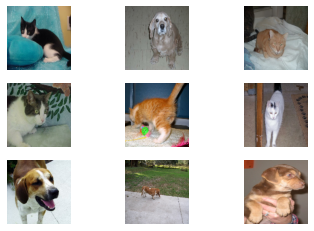

In [92]:
for i in range(9):
    for images in val_data.take(1):

        img = np.array(images[0])
        img = img.astype('uint8')
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        #plt.title(class_names[labels[i]])
        plt.axis("off")

# Build the model

In [106]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(scale=1./255, input_shape=(128,128,3)),
    
     
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax' )
])

model.compile(
    optimizer='Adam',
    loss='SparseCategoricalCrossentropy',
    metrics='accuracy',
)

model.summary()



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                 

## Fiting the model

In [116]:
EPOCHS = 20
BATCH_SIZE = None

model.fit(
    train_data_batch,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    callbacks=tf.keras.callbacks.EarlyStopping(patience=3),
    validation_data=val_data_batch,
    initial_epoch=11,
)

Epoch 12/20
547/547 [==============================] - 472s 861ms/step - loss: 0.2745 - accuracy: 0.8819 - val_loss: 0.3682 - val_accuracy: 0.8430
Epoch 13/20
547/547 [==============================] - 469s 857ms/step - loss: 0.2502 - accuracy: 0.8948 - val_loss: 0.3279 - val_accuracy: 0.8622
Epoch 14/20
547/547 [==============================] - 465s 849ms/step - loss: 0.2226 - accuracy: 0.9105 - val_loss: 0.3242 - val_accuracy: 0.8775
Epoch 15/20
547/547 [==============================] - 465s 850ms/step - loss: 0.1936 - accuracy: 0.9229 - val_loss: 0.3222 - val_accuracy: 0.8714
Epoch 16/20
547/547 [==============================] - 464s 847ms/step - loss: 0.1619 - accuracy: 0.9364 - val_loss: 0.3193 - val_accuracy: 0.8767
Epoch 17/20
547/547 [==============================] - 470s 858ms/step - loss: 0.1604 - accuracy: 0.9396 - val_loss: 0.3233 - val_accuracy: 0.8767
Epoch 18/20
547/547 [==============================] - 466s 851ms/step - loss: 0.1336 - accuracy: 0.9467 - val_loss: 0

In [117]:
model.evaluate(test_data_batch, verbose=1)

157/157 [==============================] - 77s 401ms/step - loss: 0.4416 - accuracy: 0.8372


[0.4415699243545532, 0.83720463514328]

###### 83 percent accuracy, not perfect, but at this point it satisfies me

In [153]:
## make some prediction

def make_predict(predict_path):
    img_file = tf.keras.utils.load_img(predict_path, target_size=(128,128))
    input_arr = tf.keras.utils.img_to_array(img_file)
    input_arr = np.array([input_arr])  # Convert single image to a batch.
    prediction = model.predict(input_arr)
    cat_p = prediction[0][0]
    dog_p = prediction[0][1]
    plt.imshow(img_file)
    return print("the prbability of cat is ",cat_p , "the prbability of dog is ", dog_p)




1/1 [==============================] - 0s 30ms/step
the prbability of cat is  0.9998222 the prbability of dog is  0.00017786365


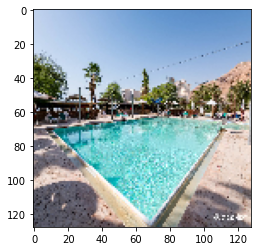

In [159]:
predict_path ="prdiction\stam.jpg"
make_predict(predict_path)   

At the moment the model knows how to differentiate between a dog and a cat, but any other image it will also try to predict it, we will leave that for later

# Deploy to IBM watson 

In [3]:
api_key =API_KEY
location = 'eu-gb'

wml_credentials = {
    "apikey": api_key,
    "url": 'https://' + location + '.ml.cloud.ibm.com'
}

In [4]:
from ibm_watson_machine_learning import APIClient

client = APIClient(wml_credentials)

In [ ]:
client.spaces.list(limit=10)

In [13]:
space_id = '2fb95d56-5e02-4efd-a9ba-44d5496071f8'
client.set.default_space(space_id)

'SUCCESS'

In [19]:
software_spec_uid = client.software_specifications.get_id_by_name("runtime-22.1-py3.9")

In [ ]:
client.wml_credentials

In [40]:
model_path =os.path.join('CatsandDog\model')

In [42]:
metadata = {
            client.repository.ModelMetaNames.NAME: 'Cats and Dog',
            client.repository.ModelMetaNames.TYPE: 'tensorflow_2.7',
            client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}

published_model = client.repository.store_model(
    model=model_path,
    meta_props=metadata)

In [ ]:
import json

published_model_uid = client.repository.get_model_id(published_model)
model_details = client.repository.get_details(published_model_uid)
print(json.dumps(model_details, indent=2))

In [ ]:
models_details = client.repository.list_models()

In [ ]:
metadata = {
    client.deployments.ConfigurationMetaNames.NAME: "Deployment of Cats and dog",
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

created_deployment = client.deployments.create(published_model_uid, meta_props=metadata)

In [ ]:
deployment_uid = client.deployments.get_uid(created_deployment)
scoring_endpoint = client.deployments.get_scoring_href(created_deployment)
print(scoring_endpoint)

In [ ]:
client.deployments.get_details(deployment_uid)

In [17]:
#scoring with our deployd model

score = tf.keras.utils.load_img(os.path.join('.\prdiction\dog1.jpg') , target_size=(128,128))
input_arr = tf.keras.utils.img_to_array(score)
input_arr = np.array(input_arr)

input_arr

array([[[ 93., 117.,  69.],
        [145., 156., 113.],
        [119., 140.,  84.],
        ...,
        [123., 161., 122.],
        [ 97., 150.,  96.],
        [135., 184.,  93.]],

       [[105., 122.,  80.],
        [139., 143., 110.],
        [118., 132.,  83.],
        ...,
        [122., 153., 121.],
        [ 92., 140.,  92.],
        [122., 168.,  96.]],

       [[102., 129.,  62.],
        [129., 142.,  89.],
        [123., 145.,  83.],
        ...,
        [130., 141., 111.],
        [102., 124.,  77.],
        [132., 149.,  97.]],

       ...,

       [[104., 140.,  53.],
        [182., 188., 150.],
        [228., 228., 190.],
        ...,
        [116., 120.,  87.],
        [127., 135., 112.],
        [ 50.,  90.,  28.]],

       [[191., 223., 160.],
        [155., 183.,  73.],
        [183., 219., 109.],
        ...,
        [161., 155., 155.],
        [167., 158., 163.],
        [ 74., 120.,  58.]],

       [[218., 239., 160.],
        [208., 219., 176.],
        [194., 2

In [18]:
scoring_payload = {"input_data": [{"values": [input_arr.tolist()]}]}

In [19]:
predictions = client.deployments.score(deployment_uid, scoring_payload)
print(json.dumps(predictions, indent=2))

{
  "predictions": [
    {
      "id": "dense_11",
      "values": [
        [
          0.16814836859703064,
          0.831851601600647
        ]
      ]
    }
  ]
}


we have a deployd model on Watson Studio

the next step is FUll stack it into a web app